pip install optuna (in terminal)

In [1]:
import optuna
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


Define the objective function 

In [103]:
xmin = -100
xmax = 100
ymin = -100
ymax = 100

#Change the function to be optimized here 
def func(x,y):
    return (x - y)
    
def objective(trial):
    noise = 0*(np.random.rand(1) - 0.5)
    x = trial.suggest_float("x", xmin, xmax)
    y = trial.suggest_float("y", ymin, ymax)
    return -(func(x,y) + noise) #Optuna finds the minimum so add a negative to the function to find the maximum 

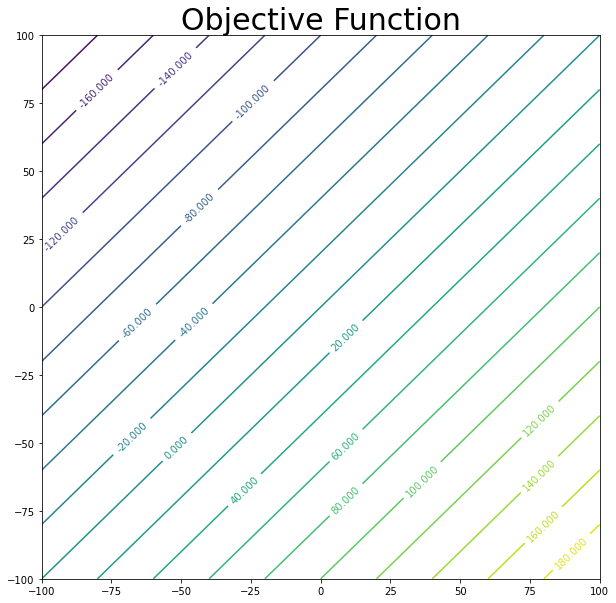

In [104]:
x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = func(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()
        

### Pick a type of sampler 
Tree-structured Parzen Estimator algorithm implemented in optuna.samplers.TPESampler

CMA-ES based algorithm implemented in optuna.samplers.CmaEsSampler

Grid Search implemented in optuna.samplers.GridSampler

Random Search implemented in optuna.samplers.RandomSampler

# Data Generator

Code runs 100 trials to obtain the actual max value of the objective function. This will be used in the next code to calculate the accuracy which is the (calculated max value / actual max value). **This code only needs to be executed if the objective function is changed.**

In [105]:
max_ = []
x = []
y = []
for i in range(10): #How many iterations per datapoint 
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.TPESampler())
    study.optimize(objective, n_trials=100)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    max_.append(func(found_x, found_y))
max_value = np.max(max_)
    

[I 2021-03-04 11:11:56,300] A new study created in memory with name: no-name-8f742c87-2f48-418f-a77b-3946d7a763c6
[I 2021-03-04 11:11:56,309] A new study created in memory with name: no-name-20343da0-4b77-48a5-b073-f39783479fd2
[I 2021-03-04 11:11:56,313] Trial 0 finished with value: -2.518368826524963 and parameters: {'x': -42.07731368035639, 'y': -44.59568250688135}. Best is trial 0 with value: -2.518368826524963.
[I 2021-03-04 11:11:56,317] Trial 1 finished with value: -124.10815536900874 and parameters: {'x': 30.860076332893897, 'y': -93.24807903611485}. Best is trial 1 with value: -124.10815536900874.
[I 2021-03-04 11:11:56,321] Trial 2 finished with value: 138.04952976286825 and parameters: {'x': -68.91187163509834, 'y': 69.13765812776992}. Best is trial 1 with value: -124.10815536900874.
[I 2021-03-04 11:11:56,334] Trial 3 finished with value: 4.71700373484596 and parameters: {'x': -35.3735136086965, 'y': -30.65650987385054}. Best is trial 1 with value: -124.10815536900874.
[I 2

[I 2021-03-04 11:11:58,328] Trial 39 finished with value: -152.6313769083022 and parameters: {'x': 54.23356126712288, 'y': -98.39781564117932}. Best is trial 30 with value: -174.80635814175332.
[I 2021-03-04 11:11:58,399] Trial 40 finished with value: -123.93742684723695 and parameters: {'x': 34.313606549091986, 'y': -89.62382029814496}. Best is trial 30 with value: -174.80635814175332.
[I 2021-03-04 11:11:58,502] Trial 41 finished with value: -173.13411583601774 and parameters: {'x': 73.7633589548051, 'y': -99.37075688121264}. Best is trial 30 with value: -174.80635814175332.
[I 2021-03-04 11:11:58,565] Trial 42 finished with value: -157.18700403151115 and parameters: {'x': 79.39981232815695, 'y': -77.7871917033542}. Best is trial 30 with value: -174.80635814175332.
[I 2021-03-04 11:11:58,639] Trial 43 finished with value: -165.1592600643656 and parameters: {'x': 72.85872094149303, 'y': -92.30053912287258}. Best is trial 30 with value: -174.80635814175332.
[I 2021-03-04 11:11:58,701] 

[I 2021-03-04 11:12:02,033] Trial 79 finished with value: -158.88700599263234 and parameters: {'x': 99.88320033533601, 'y': -59.003805657296326}. Best is trial 77 with value: -191.51865329160387.
[I 2021-03-04 11:12:02,128] Trial 80 finished with value: -182.46267749857287 and parameters: {'x': 89.67743885065472, 'y': -92.78523864791816}. Best is trial 77 with value: -191.51865329160387.
[I 2021-03-04 11:12:02,195] Trial 81 finished with value: -62.859208772128326 and parameters: {'x': -26.368825438316804, 'y': -89.22803421044513}. Best is trial 77 with value: -191.51865329160387.
[I 2021-03-04 11:12:02,260] Trial 82 finished with value: -183.7232092482357 and parameters: {'x': 89.58624730697292, 'y': -94.13696194126277}. Best is trial 77 with value: -191.51865329160387.
[I 2021-03-04 11:12:02,332] Trial 83 finished with value: -186.0159054144044 and parameters: {'x': 91.45452242803104, 'y': -94.56138298637335}. Best is trial 77 with value: -191.51865329160387.
[I 2021-03-04 11:12:02,4

Found x: 99.87153071612336, (x - 2)^2: 191.51865329160387
Found y: -91.64712257548051, (x - 2)^2: 191.51865329160387


[I 2021-03-04 11:12:03,565] Trial 11 finished with value: -192.57777752654061 and parameters: {'x': 96.7977378562516, 'y': -95.780039670289}. Best is trial 11 with value: -192.57777752654061.
[I 2021-03-04 11:12:03,619] Trial 12 finished with value: -89.37499087041152 and parameters: {'x': 32.74679370034792, 'y': -56.62819717006361}. Best is trial 11 with value: -192.57777752654061.
[I 2021-03-04 11:12:03,689] Trial 13 finished with value: -128.8870474873109 and parameters: {'x': 98.56389178676022, 'y': -30.32315570055067}. Best is trial 11 with value: -192.57777752654061.
[I 2021-03-04 11:12:03,753] Trial 14 finished with value: -147.62560606079876 and parameters: {'x': 57.13213384502646, 'y': -90.4934722157723}. Best is trial 11 with value: -192.57777752654061.
[I 2021-03-04 11:12:03,801] Trial 15 finished with value: -83.02783267788229 and parameters: {'x': 19.952330898168825, 'y': -63.075501779713456}. Best is trial 11 with value: -192.57777752654061.
[I 2021-03-04 11:12:03,880] Tr

[I 2021-03-04 11:12:06,303] Trial 51 finished with value: -188.3232060788751 and parameters: {'x': 99.37781319075299, 'y': -88.9453928881221}. Best is trial 42 with value: -198.2388527495894.
[I 2021-03-04 11:12:06,364] Trial 52 finished with value: -47.41394266179552 and parameters: {'x': 99.9253505784173, 'y': 52.51140791662178}. Best is trial 42 with value: -198.2388527495894.
[I 2021-03-04 11:12:06,415] Trial 53 finished with value: -177.90482437094508 and parameters: {'x': 88.13625302632035, 'y': -89.76857134462473}. Best is trial 42 with value: -198.2388527495894.
[I 2021-03-04 11:12:06,456] Trial 54 finished with value: -188.06349083381627 and parameters: {'x': 94.87381397895794, 'y': -93.18967685485835}. Best is trial 42 with value: -198.2388527495894.
[I 2021-03-04 11:12:06,502] Trial 55 finished with value: -174.55403037451026 and parameters: {'x': 93.07238277386791, 'y': -81.48164760064233}. Best is trial 42 with value: -198.2388527495894.
[I 2021-03-04 11:12:06,566] Trial 5

[I 2021-03-04 11:12:08,556] Trial 91 finished with value: -179.1609258963988 and parameters: {'x': 89.23527529897142, 'y': -89.92565059742739}. Best is trial 65 with value: -199.60941882881372.
[I 2021-03-04 11:12:08,629] Trial 92 finished with value: -194.7257857038856 and parameters: {'x': 95.04054139114083, 'y': -99.68524431274479}. Best is trial 65 with value: -199.60941882881372.
[I 2021-03-04 11:12:08,704] Trial 93 finished with value: -199.4958633860736 and parameters: {'x': 99.8153013536004, 'y': -99.6805620324732}. Best is trial 65 with value: -199.60941882881372.
[I 2021-03-04 11:12:08,794] Trial 94 finished with value: -180.37436279308577 and parameters: {'x': 94.8726044412523, 'y': -85.50175835183344}. Best is trial 65 with value: -199.60941882881372.
[I 2021-03-04 11:12:08,860] Trial 95 finished with value: -179.8898766873487 and parameters: {'x': 80.02675832922921, 'y': -99.86311835811951}. Best is trial 65 with value: -199.60941882881372.
[I 2021-03-04 11:12:08,958] Tria

Found x: 99.67750293545917, (x - 2)^2: 199.60941882881372
Found y: -99.93191589335453, (x - 2)^2: 199.60941882881372


[I 2021-03-04 11:12:09,458] Trial 10 finished with value: -8.662763913973084 and parameters: {'x': -24.28766191852905, 'y': -32.950425832502134}. Best is trial 6 with value: -187.7038624625743.
[I 2021-03-04 11:12:09,537] Trial 11 finished with value: -192.3616567167124 and parameters: {'x': 94.40707262107277, 'y': -97.9545840956396}. Best is trial 11 with value: -192.3616567167124.
[I 2021-03-04 11:12:09,590] Trial 12 finished with value: -5.210472603272251 and parameters: {'x': -93.61238370483346, 'y': -98.82285630810571}. Best is trial 11 with value: -192.3616567167124.
[I 2021-03-04 11:12:09,645] Trial 13 finished with value: -124.19029815406472 and parameters: {'x': 89.848103073908, 'y': -34.34219508015671}. Best is trial 11 with value: -192.3616567167124.
[I 2021-03-04 11:12:09,693] Trial 14 finished with value: -197.75007061969177 and parameters: {'x': 99.08860964926835, 'y': -98.6614609704234}. Best is trial 14 with value: -197.75007061969177.
[I 2021-03-04 11:12:09,745] Trial 

[I 2021-03-04 11:12:11,544] Trial 50 finished with value: -173.78674665165693 and parameters: {'x': 90.3803935295987, 'y': -83.4063531220582}. Best is trial 26 with value: -198.98021747540568.
[I 2021-03-04 11:12:11,610] Trial 51 finished with value: -182.54045408628255 and parameters: {'x': 90.28302983333282, 'y': -92.25742425294973}. Best is trial 26 with value: -198.98021747540568.
[I 2021-03-04 11:12:11,666] Trial 52 finished with value: -176.56328443992075 and parameters: {'x': 77.40244839101952, 'y': -99.16083604890123}. Best is trial 26 with value: -198.98021747540568.
[I 2021-03-04 11:12:11,711] Trial 53 finished with value: -169.99450088150087 and parameters: {'x': 86.53952431440715, 'y': -83.45497656709374}. Best is trial 26 with value: -198.98021747540568.
[I 2021-03-04 11:12:11,765] Trial 54 finished with value: -164.10338343633998 and parameters: {'x': 94.12053249977265, 'y': -69.98285093656732}. Best is trial 26 with value: -198.98021747540568.
[I 2021-03-04 11:12:11,811]

[I 2021-03-04 11:12:13,670] Trial 90 finished with value: -174.03800377147041 and parameters: {'x': 96.73417041466706, 'y': -77.30383335680337}. Best is trial 65 with value: -199.87397090880157.
[I 2021-03-04 11:12:13,709] Trial 91 finished with value: -198.5387181436123 and parameters: {'x': 98.92534985259768, 'y': -99.61336829101461}. Best is trial 65 with value: -199.87397090880157.
[I 2021-03-04 11:12:13,745] Trial 92 finished with value: -192.4101987234181 and parameters: {'x': 97.25636028278092, 'y': -95.15383844063716}. Best is trial 65 with value: -199.87397090880157.
[I 2021-03-04 11:12:13,808] Trial 93 finished with value: -194.03204977008542 and parameters: {'x': 98.36666605659236, 'y': -95.66538371349306}. Best is trial 65 with value: -199.87397090880157.
[I 2021-03-04 11:12:13,857] Trial 94 finished with value: -177.1946958641148 and parameters: {'x': 87.61330286241422, 'y': -89.58139300170058}. Best is trial 65 with value: -199.87397090880157.
[I 2021-03-04 11:12:13,921] 

Found x: 99.99698490397408, (x - 2)^2: 199.87397090880157
Found y: -99.87698600482749, (x - 2)^2: 199.87397090880157


[I 2021-03-04 11:12:14,443] Trial 12 finished with value: -143.70490260108775 and parameters: {'x': 51.723934542445, 'y': -91.98096805864274}. Best is trial 10 with value: -194.28166697218364.
[I 2021-03-04 11:12:14,492] Trial 13 finished with value: -187.88938791714233 and parameters: {'x': 91.54808257344999, 'y': -96.34130534369234}. Best is trial 10 with value: -194.28166697218364.
[I 2021-03-04 11:12:14,563] Trial 14 finished with value: -179.29332631803067 and parameters: {'x': 98.59302891648787, 'y': -80.7002974015428}. Best is trial 10 with value: -194.28166697218364.
[I 2021-03-04 11:12:14,629] Trial 15 finished with value: -71.76059611032278 and parameters: {'x': 55.46086715911378, 'y': -16.299728951208998}. Best is trial 10 with value: -194.28166697218364.
[I 2021-03-04 11:12:14,681] Trial 16 finished with value: -128.09361426069665 and parameters: {'x': 57.10783602938046, 'y': -70.9857782313162}. Best is trial 10 with value: -194.28166697218364.
[I 2021-03-04 11:12:14,726] T

[I 2021-03-04 11:12:17,353] Trial 52 finished with value: -190.2547882328039 and parameters: {'x': 91.63036205901494, 'y': -98.62442617378896}. Best is trial 23 with value: -198.30052214256548.
[I 2021-03-04 11:12:17,460] Trial 53 finished with value: -172.37117428071696 and parameters: {'x': 98.65272403568517, 'y': -73.71845024503178}. Best is trial 23 with value: -198.30052214256548.
[I 2021-03-04 11:12:17,559] Trial 54 finished with value: -157.01776079292085 and parameters: {'x': 73.66845027556074, 'y': -83.34931051736011}. Best is trial 23 with value: -198.30052214256548.
[I 2021-03-04 11:12:17,641] Trial 55 finished with value: -175.83043957785387 and parameters: {'x': 83.96231292866862, 'y': -91.86812664918524}. Best is trial 23 with value: -198.30052214256548.
[I 2021-03-04 11:12:17,723] Trial 56 finished with value: -144.13707798570238 and parameters: {'x': 48.27568388573157, 'y': -95.8613940999708}. Best is trial 23 with value: -198.30052214256548.
[I 2021-03-04 11:12:17,830]

[I 2021-03-04 11:12:19,998] Trial 92 finished with value: -192.0497502752042 and parameters: {'x': 98.40569292830276, 'y': -93.64405734690145}. Best is trial 91 with value: -199.72825184724957.
[I 2021-03-04 11:12:20,056] Trial 93 finished with value: -194.95463548949238 and parameters: {'x': 99.7787429557558, 'y': -95.17589253373659}. Best is trial 91 with value: -199.72825184724957.
[I 2021-03-04 11:12:20,100] Trial 94 finished with value: -193.5809179270066 and parameters: {'x': 99.18949902079581, 'y': -94.39141890621079}. Best is trial 91 with value: -199.72825184724957.
[I 2021-03-04 11:12:20,156] Trial 95 finished with value: -94.35702778040168 and parameters: {'x': 5.630027938908086, 'y': -88.7269998414936}. Best is trial 91 with value: -199.72825184724957.
[I 2021-03-04 11:12:20,213] Trial 96 finished with value: -180.39789552439603 and parameters: {'x': 99.29576550246847, 'y': -81.10213002192756}. Best is trial 91 with value: -199.72825184724957.
[I 2021-03-04 11:12:20,263] Tr

Found x: 99.73392268544498, (x - 2)^2: 199.72825184724957
Found y: -99.9943291618046, (x - 2)^2: 199.72825184724957


[I 2021-03-04 11:12:20,606] Trial 11 finished with value: -143.82015457175893 and parameters: {'x': 96.11139953761636, 'y': -47.70875503414256}. Best is trial 10 with value: -144.87350239674186.
[I 2021-03-04 11:12:20,661] Trial 12 finished with value: -138.29380520322974 and parameters: {'x': 97.53928884127855, 'y': -40.754516361951175}. Best is trial 10 with value: -144.87350239674186.
[I 2021-03-04 11:12:20,729] Trial 13 finished with value: -68.60880469094707 and parameters: {'x': 91.80520890822156, 'y': 23.196404217274498}. Best is trial 10 with value: -144.87350239674186.
[I 2021-03-04 11:12:20,774] Trial 14 finished with value: -70.21313548863385 and parameters: {'x': 18.05302879746499, 'y': -52.16010669116886}. Best is trial 10 with value: -144.87350239674186.
[I 2021-03-04 11:12:20,831] Trial 15 finished with value: -84.28095251749176 and parameters: {'x': 73.2803632415223, 'y': -11.00058927596946}. Best is trial 10 with value: -144.87350239674186.
[I 2021-03-04 11:12:20,874] 

[I 2021-03-04 11:12:22,853] Trial 51 finished with value: -187.57027504654758 and parameters: {'x': 99.33068644020851, 'y': -88.23958860633908}. Best is trial 37 with value: -198.9112174918154.
[I 2021-03-04 11:12:22,893] Trial 52 finished with value: -166.8045230035329 and parameters: {'x': 99.57660905596393, 'y': -67.22791394756895}. Best is trial 37 with value: -198.9112174918154.
[I 2021-03-04 11:12:22,937] Trial 53 finished with value: -147.7782616619352 and parameters: {'x': 91.43373539284222, 'y': -56.34452626909298}. Best is trial 37 with value: -198.9112174918154.
[I 2021-03-04 11:12:22,974] Trial 54 finished with value: -168.04819427513075 and parameters: {'x': 83.2964478936077, 'y': -84.75174638152306}. Best is trial 37 with value: -198.9112174918154.
[I 2021-03-04 11:12:23,019] Trial 55 finished with value: -162.2798850077512 and parameters: {'x': 92.87331713643225, 'y': -69.40656787131894}. Best is trial 37 with value: -198.9112174918154.
[I 2021-03-04 11:12:23,062] Trial 

[I 2021-03-04 11:12:24,780] Trial 91 finished with value: -194.79549536178152 and parameters: {'x': 94.88199503986988, 'y': -99.91350032191164}. Best is trial 73 with value: -199.58262473713688.
[I 2021-03-04 11:12:24,846] Trial 92 finished with value: -188.3831218881615 and parameters: {'x': 89.1845951737739, 'y': -99.19852671438758}. Best is trial 73 with value: -199.58262473713688.
[I 2021-03-04 11:12:24,893] Trial 93 finished with value: -187.02589647178402 and parameters: {'x': 94.77931328113614, 'y': -92.24658319064788}. Best is trial 73 with value: -199.58262473713688.
[I 2021-03-04 11:12:24,948] Trial 94 finished with value: -165.49069924536835 and parameters: {'x': 78.25281083192826, 'y': -87.23788841344009}. Best is trial 73 with value: -199.58262473713688.
[I 2021-03-04 11:12:24,993] Trial 95 finished with value: -178.76724002055684 and parameters: {'x': 84.16341751199974, 'y': -94.6038225085571}. Best is trial 73 with value: -199.58262473713688.
[I 2021-03-04 11:12:25,033] 

Found x: 99.83571269949711, (x - 2)^2: 199.58262473713688
Found y: -99.74691203763976, (x - 2)^2: 199.58262473713688


[I 2021-03-04 11:12:25,416] Trial 12 finished with value: -192.70025216360347 and parameters: {'x': 98.59136421394082, 'y': -94.10888794966263}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:25,472] Trial 13 finished with value: -66.5648627507607 and parameters: {'x': -25.948681720433985, 'y': -92.51354447119468}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:25,588] Trial 14 finished with value: -163.7448861184066 and parameters: {'x': 68.65382234853396, 'y': -95.09106376987266}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:25,682] Trial 15 finished with value: -150.04828615391753 and parameters: {'x': 98.2016101895324, 'y': -51.846675964385135}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:25,750] Trial 16 finished with value: -170.85978859837576 and parameters: {'x': 71.93874514826052, 'y': -98.92104345011522}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:25,820

[I 2021-03-04 11:12:27,463] Trial 52 finished with value: -191.87565537917123 and parameters: {'x': 98.87699842615241, 'y': -92.99865695301884}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:27,523] Trial 53 finished with value: -188.99872227262713 and parameters: {'x': 99.80355574961717, 'y': -89.19516652300996}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:27,563] Trial 54 finished with value: -172.1321896091568 and parameters: {'x': 79.7061812225583, 'y': -92.42600838659851}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:27,605] Trial 55 finished with value: -166.96836734465018 and parameters: {'x': 98.93904889968623, 'y': -68.02931844496396}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:27,651] Trial 56 finished with value: -164.7131623755419 and parameters: {'x': 84.54531956065732, 'y': -80.16784281488461}. Best is trial 12 with value: -192.70025216360347.
[I 2021-03-04 11:12:27,695] 

[I 2021-03-04 11:12:29,465] Trial 92 finished with value: -188.7573342681717 and parameters: {'x': 95.65504137277489, 'y': -93.10229289539679}. Best is trial 72 with value: -193.68212647072076.
[I 2021-03-04 11:12:29,515] Trial 93 finished with value: -188.00869874910288 and parameters: {'x': 94.6929034068588, 'y': -93.31579534224407}. Best is trial 72 with value: -193.68212647072076.
[I 2021-03-04 11:12:29,573] Trial 94 finished with value: -182.47188830169455 and parameters: {'x': 82.65009034338104, 'y': -99.82179795831352}. Best is trial 72 with value: -193.68212647072076.
[I 2021-03-04 11:12:29,616] Trial 95 finished with value: -160.06324339026241 and parameters: {'x': 64.29716233865213, 'y': -95.7660810516103}. Best is trial 72 with value: -193.68212647072076.
[I 2021-03-04 11:12:29,661] Trial 96 finished with value: -151.75747563317287 and parameters: {'x': 71.44683713117358, 'y': -80.3106385019993}. Best is trial 72 with value: -193.68212647072076.
[I 2021-03-04 11:12:29,704] T

Found x: 94.34854418546036, (x - 2)^2: 193.68212647072076
Found y: -99.3335822852604, (x - 2)^2: 193.68212647072076


[I 2021-03-04 11:12:30,067] Trial 12 finished with value: -109.12818500159383 and parameters: {'x': 11.863377713913046, 'y': -97.2648072876808}. Best is trial 10 with value: -125.48235985339193.
[I 2021-03-04 11:12:30,118] Trial 13 finished with value: -96.9629471150794 and parameters: {'x': -2.7551815192247844, 'y': -99.71812863430418}. Best is trial 10 with value: -125.48235985339193.
[I 2021-03-04 11:12:30,162] Trial 14 finished with value: -144.3885090454575 and parameters: {'x': 79.67352724418646, 'y': -64.71498180127105}. Best is trial 14 with value: -144.3885090454575.
[I 2021-03-04 11:12:30,215] Trial 15 finished with value: -161.07553504368576 and parameters: {'x': 98.24699368036022, 'y': -62.82854136332553}. Best is trial 15 with value: -161.07553504368576.
[I 2021-03-04 11:12:30,267] Trial 16 finished with value: -155.45391261224864 and parameters: {'x': 97.98093081024193, 'y': -57.47298180200671}. Best is trial 15 with value: -161.07553504368576.
[I 2021-03-04 11:12:30,316]

[I 2021-03-04 11:12:31,955] Trial 52 finished with value: -192.69643952861503 and parameters: {'x': 93.00048621514094, 'y': -99.69595331347409}. Best is trial 51 with value: -197.8382314001787.
[I 2021-03-04 11:12:31,999] Trial 53 finished with value: -5.119853011039396 and parameters: {'x': -93.43253368351078, 'y': -98.55238669455018}. Best is trial 51 with value: -197.8382314001787.
[I 2021-03-04 11:12:32,052] Trial 54 finished with value: -198.68263867728578 and parameters: {'x': 99.76341973537849, 'y': -98.91921894190729}. Best is trial 54 with value: -198.68263867728578.
[I 2021-03-04 11:12:32,097] Trial 55 finished with value: -37.776654089342905 and parameters: {'x': 98.91383053113397, 'y': 61.13717644179106}. Best is trial 54 with value: -198.68263867728578.
[I 2021-03-04 11:12:32,157] Trial 56 finished with value: -175.143849661618 and parameters: {'x': 75.31712793520111, 'y': -99.82672172641686}. Best is trial 54 with value: -198.68263867728578.
[I 2021-03-04 11:12:32,202] Tr

[I 2021-03-04 11:12:33,871] Trial 92 finished with value: -195.6871258072866 and parameters: {'x': 99.81432293102947, 'y': -95.87280287625714}. Best is trial 77 with value: -199.67666944654496.
[I 2021-03-04 11:12:33,919] Trial 93 finished with value: -188.44504123382035 and parameters: {'x': 99.44464738563343, 'y': -89.0003938481869}. Best is trial 77 with value: -199.67666944654496.
[I 2021-03-04 11:12:33,966] Trial 94 finished with value: -199.684069076023 and parameters: {'x': 99.6950845235585, 'y': -99.9889845524645}. Best is trial 94 with value: -199.684069076023.
[I 2021-03-04 11:12:34,017] Trial 95 finished with value: -184.03486185158772 and parameters: {'x': 99.7235364540481, 'y': -84.31132539753962}. Best is trial 94 with value: -199.684069076023.
[I 2021-03-04 11:12:34,065] Trial 96 finished with value: -92.995103234309 and parameters: {'x': 95.64077212689475, 'y': 2.6456688925857463}. Best is trial 94 with value: -199.684069076023.
[I 2021-03-04 11:12:34,116] Trial 97 fini

Found x: 99.6950845235585, (x - 2)^2: 199.684069076023
Found y: -99.9889845524645, (x - 2)^2: 199.684069076023


[I 2021-03-04 11:12:34,451] Trial 11 finished with value: -81.96152188610819 and parameters: {'x': -17.770778568748515, 'y': -99.7323004548567}. Best is trial 10 with value: -82.7630892700033.
[I 2021-03-04 11:12:34,509] Trial 12 finished with value: -102.45172651769101 and parameters: {'x': 4.416245833699479, 'y': -98.03548068399154}. Best is trial 12 with value: -102.45172651769101.
[I 2021-03-04 11:12:34,560] Trial 13 finished with value: -56.42515539265544 and parameters: {'x': 16.29493306943375, 'y': -40.130222323221695}. Best is trial 12 with value: -102.45172651769101.
[I 2021-03-04 11:12:34,604] Trial 14 finished with value: -46.201885964737244 and parameters: {'x': 3.6594383872714737, 'y': -42.54244757746577}. Best is trial 12 with value: -102.45172651769101.
[I 2021-03-04 11:12:34,657] Trial 15 finished with value: -52.341258070237345 and parameters: {'x': -44.70335251864596, 'y': -97.0446105888833}. Best is trial 12 with value: -102.45172651769101.
[I 2021-03-04 11:12:34,700

[I 2021-03-04 11:12:36,361] Trial 51 finished with value: -197.48726271846672 and parameters: {'x': 98.43477023276225, 'y': -99.05249248570448}. Best is trial 47 with value: -198.67955303726708.
[I 2021-03-04 11:12:36,412] Trial 52 finished with value: -199.51610820664112 and parameters: {'x': 99.6443524428327, 'y': -99.87175576380842}. Best is trial 52 with value: -199.51610820664112.
[I 2021-03-04 11:12:36,446] Trial 53 finished with value: -189.4725637048539 and parameters: {'x': 98.21610356757914, 'y': -91.25646013727477}. Best is trial 52 with value: -199.51610820664112.
[I 2021-03-04 11:12:36,493] Trial 54 finished with value: -194.0447758931403 and parameters: {'x': 99.88954586009102, 'y': -94.15523003304926}. Best is trial 52 with value: -199.51610820664112.
[I 2021-03-04 11:12:36,540] Trial 55 finished with value: -198.26950949449798 and parameters: {'x': 99.01319667107666, 'y': -99.25631282342133}. Best is trial 52 with value: -199.51610820664112.
[I 2021-03-04 11:12:36,593] 

[I 2021-03-04 11:12:38,334] Trial 91 finished with value: -191.82793382434272 and parameters: {'x': 95.3859730727535, 'y': -96.44196075158924}. Best is trial 75 with value: -199.73693552757078.
[I 2021-03-04 11:12:38,381] Trial 92 finished with value: -198.33505156700926 and parameters: {'x': 98.90963912812337, 'y': -99.42541243888587}. Best is trial 75 with value: -199.73693552757078.
[I 2021-03-04 11:12:38,424] Trial 93 finished with value: -199.76054944539914 and parameters: {'x': 99.89274198610671, 'y': -99.86780745929241}. Best is trial 93 with value: -199.76054944539914.
[I 2021-03-04 11:12:38,463] Trial 94 finished with value: -169.55169285234098 and parameters: {'x': 84.92501631073509, 'y': -84.62667654160589}. Best is trial 93 with value: -199.76054944539914.
[I 2021-03-04 11:12:38,501] Trial 95 finished with value: -184.10955777328394 and parameters: {'x': 94.06852972902918, 'y': -90.04102804425476}. Best is trial 93 with value: -199.76054944539914.
[I 2021-03-04 11:12:38,549

Found x: 99.98244699569636, (x - 2)^2: 199.84318009330661
Found y: -99.86073309761024, (x - 2)^2: 199.84318009330661


[I 2021-03-04 11:12:39,043] Trial 13 finished with value: -38.92731271984935 and parameters: {'x': 12.646845014501107, 'y': -26.28046770534824}. Best is trial 2 with value: -48.31002356530736.
[I 2021-03-04 11:12:39,098] Trial 14 finished with value: -132.50568138188464 and parameters: {'x': 40.63280584632946, 'y': -91.87287553555518}. Best is trial 14 with value: -132.50568138188464.
[I 2021-03-04 11:12:39,157] Trial 15 finished with value: -185.41277875226666 and parameters: {'x': 87.11656460132527, 'y': -98.2962141509414}. Best is trial 15 with value: -185.41277875226666.
[I 2021-03-04 11:12:39,212] Trial 16 finished with value: -193.00045718210106 and parameters: {'x': 94.76765322649278, 'y': -98.23280395560826}. Best is trial 16 with value: -193.00045718210106.
[I 2021-03-04 11:12:39,265] Trial 17 finished with value: -187.6234429366291 and parameters: {'x': 99.23449218252732, 'y': -88.38895075410178}. Best is trial 16 with value: -193.00045718210106.
[I 2021-03-04 11:12:39,315] T

[I 2021-03-04 11:12:40,927] Trial 53 finished with value: -171.69930875983712 and parameters: {'x': 75.0837968376844, 'y': -96.61551192215272}. Best is trial 51 with value: -199.06074037689007.
[I 2021-03-04 11:12:40,982] Trial 54 finished with value: -163.45917525342173 and parameters: {'x': 63.676683740717365, 'y': -99.78249151270437}. Best is trial 51 with value: -199.06074037689007.
[I 2021-03-04 11:12:41,027] Trial 55 finished with value: -167.9275971327 and parameters: {'x': 91.34824797234612, 'y': -76.57934916035387}. Best is trial 51 with value: -199.06074037689007.
[I 2021-03-04 11:12:41,071] Trial 56 finished with value: -173.02515154192662 and parameters: {'x': 82.82694467463818, 'y': -90.19820686728845}. Best is trial 51 with value: -199.06074037689007.
[I 2021-03-04 11:12:41,132] Trial 57 finished with value: -193.5244256240763 and parameters: {'x': 93.54427873139366, 'y': -99.98014689268261}. Best is trial 51 with value: -199.06074037689007.
[I 2021-03-04 11:12:41,195] Tr

[I 2021-03-04 11:12:42,937] Trial 93 finished with value: -173.6604119121932 and parameters: {'x': 89.56038849020081, 'y': -84.1000234219924}. Best is trial 76 with value: -199.38928744011247.
[I 2021-03-04 11:12:42,996] Trial 94 finished with value: -168.8380579016838 and parameters: {'x': 78.4671760178071, 'y': -90.3708818838767}. Best is trial 76 with value: -199.38928744011247.
[I 2021-03-04 11:12:43,032] Trial 95 finished with value: -185.15689842898047 and parameters: {'x': 85.93076374677997, 'y': -99.22613468220048}. Best is trial 76 with value: -199.38928744011247.
[I 2021-03-04 11:12:43,075] Trial 96 finished with value: -195.63823106629178 and parameters: {'x': 99.81754131413716, 'y': -95.8206897521546}. Best is trial 76 with value: -199.38928744011247.
[I 2021-03-04 11:12:43,142] Trial 97 finished with value: -175.66887365033398 and parameters: {'x': 91.63917940452637, 'y': -84.0296942458076}. Best is trial 76 with value: -199.38928744011247.
[I 2021-03-04 11:12:43,224] Tria

Found x: 99.80591786521484, (x - 2)^2: 199.38928744011247
Found y: -99.58336957489765, (x - 2)^2: 199.38928744011247


[I 2021-03-04 11:12:43,508] Trial 11 finished with value: -139.27618222337435 and parameters: {'x': 82.92752706471882, 'y': -56.348655158655525}. Best is trial 1 with value: -143.25216267053844.
[I 2021-03-04 11:12:43,572] Trial 12 finished with value: -120.08486519199221 and parameters: {'x': 95.10814563241253, 'y': -24.97671955957967}. Best is trial 1 with value: -143.25216267053844.
[I 2021-03-04 11:12:43,623] Trial 13 finished with value: -97.32280706910136 and parameters: {'x': 36.58219619434862, 'y': -60.74061087475274}. Best is trial 1 with value: -143.25216267053844.
[I 2021-03-04 11:12:43,669] Trial 14 finished with value: -85.4289643511367 and parameters: {'x': 74.17142301786457, 'y': -11.25754133327213}. Best is trial 1 with value: -143.25216267053844.
[I 2021-03-04 11:12:43,706] Trial 15 finished with value: -97.60019234533888 and parameters: {'x': 21.07868616574781, 'y': -76.52150617959107}. Best is trial 1 with value: -143.25216267053844.
[I 2021-03-04 11:12:43,748] Trial

[I 2021-03-04 11:12:45,407] Trial 51 finished with value: -182.30436841167977 and parameters: {'x': 99.47261317950874, 'y': -82.83175523217102}. Best is trial 35 with value: -199.16123130289333.
[I 2021-03-04 11:12:45,456] Trial 52 finished with value: -183.45154618026075 and parameters: {'x': 91.51524753604802, 'y': -91.93629864421273}. Best is trial 35 with value: -199.16123130289333.
[I 2021-03-04 11:12:45,512] Trial 53 finished with value: -179.34905796894975 and parameters: {'x': 80.50850384659189, 'y': -98.84055412235784}. Best is trial 35 with value: -199.16123130289333.
[I 2021-03-04 11:12:45,554] Trial 54 finished with value: -180.0445981543249 and parameters: {'x': 98.21400989761581, 'y': -81.83058825670906}. Best is trial 35 with value: -199.16123130289333.
[I 2021-03-04 11:12:45,586] Trial 55 finished with value: -184.46212852252566 and parameters: {'x': 91.41571762285841, 'y': -93.04641089966725}. Best is trial 35 with value: -199.16123130289333.
[I 2021-03-04 11:12:45,636

[I 2021-03-04 11:12:47,274] Trial 91 finished with value: -199.5823230111468 and parameters: {'x': 99.71087402543074, 'y': -99.87144898571604}. Best is trial 91 with value: -199.5823230111468.
[I 2021-03-04 11:12:47,321] Trial 92 finished with value: -189.7730333401862 and parameters: {'x': 90.12121045556232, 'y': -99.65182288462387}. Best is trial 91 with value: -199.5823230111468.
[I 2021-03-04 11:12:47,374] Trial 93 finished with value: -189.07969486368796 and parameters: {'x': 89.63387185140128, 'y': -99.44582301228668}. Best is trial 91 with value: -199.5823230111468.
[I 2021-03-04 11:12:47,413] Trial 94 finished with value: -198.39749146589037 and parameters: {'x': 99.24013880833695, 'y': -99.15735265755342}. Best is trial 91 with value: -199.5823230111468.
[I 2021-03-04 11:12:47,474] Trial 95 finished with value: -128.1026885274718 and parameters: {'x': 28.248525023787323, 'y': -99.85416350368448}. Best is trial 91 with value: -199.5823230111468.
[I 2021-03-04 11:12:47,517] Tria

Found x: 99.71087402543074, (x - 2)^2: 199.5823230111468
Found y: -99.87144898571604, (x - 2)^2: 199.5823230111468


In [106]:
max_value

199.87397090880157

This code will generate the calculated max value for an optimization of 10 trials. It will divide that by the actual max value to find the accuracy. The mean_time is the average time taken to perform ONE trial. **Run this code everytime any setting of the optimizer is changed** 

Description for the type of objective function

In [108]:
Type_of_function = 'Linear'
n_of_params = 2

## CmaEs

In [147]:
accuracy = []
mean_time = []
x = []
y = []
z = []
itr_time = []
n_of_trials_vector = []
for i in range(50): #How many iterations per datapoint 
    start = time.time()
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.CmaEsSampler())
    n_of_trials = abs(int(np.round(np.random.randn(1)*5 + 10))) + 1
    study.optimize(objective, n_trials= n_of_trials)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y)/max_value)
    end = time.time()
    timetaken = (end - start)/n_of_trials
    itr_time.append(timetaken)
    n_of_trials_vector.append(n_of_trials)
    accuracy = z
    mean_time = itr_time
    
Type_of_optmizer = 'CmaEs'
n_of_trials_vector = np.asarray(n_of_trials_vector).reshape(-1,1)
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optmizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data1 = np.hstack((n_of_trials_vector, num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df_CmaEs = pd.DataFrame(data1, columns=['number of trials','number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])




[I 2021-03-04 14:01:39,375] A new study created in memory with name: no-name-a899c2c2-cb08-4b60-b745-aee823411165
[I 2021-03-04 14:01:39,401] A new study created in memory with name: no-name-bdfab65d-a278-44c4-b1d1-5e754cf027da
[I 2021-03-04 14:01:39,414] Trial 0 finished with value: -133.0860821923127 and parameters: {'x': 47.19009800790678, 'y': -85.89598418440592}. Best is trial 0 with value: -133.0860821923127.
[I 2021-03-04 14:01:39,515] Trial 1 finished with value: -20.934319826078042 and parameters: {'x': -31.07961036755596, 'y': -52.013930193634}. Best is trial 0 with value: -133.0860821923127.
[I 2021-03-04 14:01:39,525] Trial 2 finished with value: 44.31039376683525 and parameters: {'x': -50.63357572674863, 'y': -6.323181959913381}. Best is trial 0 with value: -133.0860821923127.
[I 2021-03-04 14:01:39,554] Trial 3 finished with value: 49.008195744682254 and parameters: {'x': -10.125552728981415, 'y': 38.882643015700836}. Best is trial 0 with value: -133.0860821923127.
[I 202

Found x: 49.819791224151174, (x - 2)^2: 146.43986071814345
Found y: -96.62006949399229, (x - 2)^2: 146.43986071814345


[I 2021-03-04 14:01:39,978] Trial 9 finished with value: -85.6186136387926 and parameters: {'x': 38.00563948599502, 'y': -47.61297415279757}. Best is trial 9 with value: -85.6186136387926.
[I 2021-03-04 14:01:39,993] Trial 10 finished with value: -74.9544909068091 and parameters: {'x': 51.179849829194524, 'y': -23.774641077614582}. Best is trial 9 with value: -85.6186136387926.
[I 2021-03-04 14:01:40,010] Trial 11 finished with value: -35.702221311839814 and parameters: {'x': 41.25440763369465, 'y': 5.552186321854835}. Best is trial 9 with value: -85.6186136387926.
[I 2021-03-04 14:01:40,027] Trial 12 finished with value: 1.1184277280022679 and parameters: {'x': -8.973137045360517, 'y': -7.854709317358249}. Best is trial 9 with value: -85.6186136387926.
[I 2021-03-04 14:01:40,044] Trial 13 finished with value: 63.269895841995634 and parameters: {'x': -2.953928218218813, 'y': 60.31596762377682}. Best is trial 9 with value: -85.6186136387926.
[I 2021-03-04 14:01:40,063] Trial 14 finished

Found x: 44.2542946083611, (x - 2)^2: 85.79035532475302
Found y: -41.53606071639192, (x - 2)^2: 85.79035532475302
Found x: 56.14056254908508, (x - 2)^2: 89.44964517443609
Found y: -33.309082625350996, (x - 2)^2: 89.44964517443609


[I 2021-03-04 14:01:40,281] Trial 3 finished with value: -65.17669316149244 and parameters: {'x': 41.43127620044562, 'y': -23.74541696104681}. Best is trial 0 with value: -172.69233705596642.
[I 2021-03-04 14:01:40,290] Trial 4 finished with value: -82.90363514139987 and parameters: {'x': 59.097888259644726, 'y': -23.80574688175515}. Best is trial 0 with value: -172.69233705596642.
[I 2021-03-04 14:01:40,315] Trial 5 finished with value: 79.39394145064819 and parameters: {'x': -31.906732701082774, 'y': 47.48720874956542}. Best is trial 0 with value: -172.69233705596642.
[I 2021-03-04 14:01:40,335] Trial 6 finished with value: 78.00662691672379 and parameters: {'x': -30.434602666035087, 'y': 47.572024250688706}. Best is trial 0 with value: -172.69233705596642.
[I 2021-03-04 14:01:40,363] Trial 7 finished with value: -129.6955072429964 and parameters: {'x': 52.02764913299927, 'y': -77.66785810999713}. Best is trial 0 with value: -172.69233705596642.
[I 2021-03-04 14:01:40,380] Trial 8 fi

Found x: 85.96785050944152, (x - 2)^2: 172.69233705596642
Found y: -86.7244865465249, (x - 2)^2: 172.69233705596642


[I 2021-03-04 14:01:40,684] Trial 9 finished with value: 21.22607826874657 and parameters: {'x': -24.958126681451525, 'y': -3.7320484127049554}. Best is trial 0 with value: -74.70039264899891.
[I 2021-03-04 14:01:40,702] Trial 10 finished with value: -9.65648190698105 and parameters: {'x': -31.686165791351726, 'y': -41.342647698332776}. Best is trial 0 with value: -74.70039264899891.
[I 2021-03-04 14:01:40,716] Trial 11 finished with value: -24.781908524738476 and parameters: {'x': -25.98073397954756, 'y': -50.762642504286035}. Best is trial 0 with value: -74.70039264899891.
[I 2021-03-04 14:01:40,742] Trial 12 finished with value: -117.03218516468586 and parameters: {'x': 49.67639574119728, 'y': -67.35578942348857}. Best is trial 12 with value: -117.03218516468586.
[I 2021-03-04 14:01:40,746] A new study created in memory with name: no-name-b132349c-2003-4527-83d2-1b770b3fa7ef
[I 2021-03-04 14:01:40,765] A new study created in memory with name: no-name-c8b7a680-d617-4146-8f52-631466a5

Found x: 49.67639574119728, (x - 2)^2: 117.03218516468586
Found y: -67.35578942348857, (x - 2)^2: 117.03218516468586


[I 2021-03-04 14:01:40,982] Trial 11 finished with value: 0.9667443107832625 and parameters: {'x': -64.28527278035358, 'y': -63.31852846957032}. Best is trial 10 with value: -34.12966602079275.
[I 2021-03-04 14:01:40,985] A new study created in memory with name: no-name-86acdc6a-98a0-43e5-abbb-108beeab3511
[I 2021-03-04 14:01:40,993] A new study created in memory with name: no-name-0041ae8b-02df-4a88-9128-b360d1a4c1d2
[I 2021-03-04 14:01:40,997] Trial 0 finished with value: 40.8321611877373 and parameters: {'x': 0.9411651273054673, 'y': 41.773326315042766}. Best is trial 0 with value: 40.8321611877373.
[I 2021-03-04 14:01:41,032] Trial 1 finished with value: 8.521029993929027 and parameters: {'x': 34.55022975543428, 'y': 43.07125974936331}. Best is trial 1 with value: 8.521029993929027.
[I 2021-03-04 14:01:41,060] Trial 2 finished with value: 4.195326258664004 and parameters: {'x': -3.579472791606226, 'y': 0.6158534670577773}. Best is trial 2 with value: 4.195326258664004.
[I 2021-03-0

Found x: -36.079862492760405, (x - 2)^2: 34.12966602079275
Found y: -70.20952851355315, (x - 2)^2: 34.12966602079275


[I 2021-03-04 14:01:41,194] A new study created in memory with name: no-name-6d338106-1988-43b3-828a-69d95f937f49
[I 2021-03-04 14:01:41,205] A new study created in memory with name: no-name-82012fd0-1942-4c96-a503-5d9b3587cd6e
[I 2021-03-04 14:01:41,234] Trial 0 finished with value: -12.446509049503838 and parameters: {'x': -33.44073938088488, 'y': -45.887248430388716}. Best is trial 0 with value: -12.446509049503838.
[I 2021-03-04 14:01:41,259] Trial 1 finished with value: -27.035702820086772 and parameters: {'x': 13.562057914176014, 'y': -13.473644905910758}. Best is trial 1 with value: -27.035702820086772.
[I 2021-03-04 14:01:41,269] Trial 2 finished with value: 63.95841203521663 and parameters: {'x': -22.936395157734772, 'y': 41.02201687748186}. Best is trial 1 with value: -27.035702820086772.
[I 2021-03-04 14:01:41,286] Trial 3 finished with value: -31.553971280516006 and parameters: {'x': 44.875258815025255, 'y': 13.32128753450925}. Best is trial 3 with value: -31.55397128051600

Found x: 23.269149607347604, (x - 2)^2: 13.490359022422547
Found y: 9.778790584925057, (x - 2)^2: 13.490359022422547
Found x: 39.021151967341225, (x - 2)^2: 94.72710547895863
Found y: -55.70595351161741, (x - 2)^2: 94.72710547895863


[I 2021-03-04 14:01:41,593] Trial 8 finished with value: -99.77531629434326 and parameters: {'x': 25.272762047837432, 'y': -74.50255424650582}. Best is trial 8 with value: -99.77531629434326.
[I 2021-03-04 14:01:41,612] Trial 9 finished with value: 1.7519881109189974 and parameters: {'x': 20.754611640830362, 'y': 22.50659975174936}. Best is trial 8 with value: -99.77531629434326.
[I 2021-03-04 14:01:41,626] Trial 10 finished with value: -12.924089613973269 and parameters: {'x': 15.037978530323272, 'y': 2.113888916350003}. Best is trial 8 with value: -99.77531629434326.
[I 2021-03-04 14:01:41,649] Trial 11 finished with value: -36.28711024219781 and parameters: {'x': 49.07470153008063, 'y': 12.787591287882822}. Best is trial 8 with value: -99.77531629434326.
[I 2021-03-04 14:01:41,654] A new study created in memory with name: no-name-9e6a49a7-10ce-42db-af44-5081f0f5cd1b
[I 2021-03-04 14:01:41,674] A new study created in memory with name: no-name-57b9c504-326a-4037-bb09-8db09bb1ba47
[I 2

Found x: 25.272762047837432, (x - 2)^2: 99.77531629434326
Found y: -74.50255424650582, (x - 2)^2: 99.77531629434326


[I 2021-03-04 14:01:41,883] Trial 9 finished with value: -63.32385360855198 and parameters: {'x': 45.65315321776058, 'y': -17.670700390791396}. Best is trial 7 with value: -97.22264960541199.
[I 2021-03-04 14:01:41,911] Trial 10 finished with value: -27.121012425708503 and parameters: {'x': -7.612238179831099, 'y': -34.7332506055396}. Best is trial 7 with value: -97.22264960541199.
[I 2021-03-04 14:01:41,921] Trial 11 finished with value: -46.09987082252702 and parameters: {'x': -4.108586647728153, 'y': -50.208457470255176}. Best is trial 7 with value: -97.22264960541199.
[I 2021-03-04 14:01:41,950] Trial 12 finished with value: -86.31214205940759 and parameters: {'x': 37.86939656358249, 'y': -48.44274549582511}. Best is trial 7 with value: -97.22264960541199.
[I 2021-03-04 14:01:41,969] Trial 13 finished with value: -138.14713957339205 and parameters: {'x': 44.77128028188562, 'y': -93.37585929150643}. Best is trial 13 with value: -138.14713957339205.
[I 2021-03-04 14:01:41,980] A new 

Found x: 44.77128028188562, (x - 2)^2: 138.14713957339205
Found y: -93.37585929150643, (x - 2)^2: 138.14713957339205
Found x: 52.79128476213802, (x - 2)^2: 77.41434859348465
Found y: -24.623063831346627, (x - 2)^2: 77.41434859348465


[I 2021-03-04 14:01:42,182] Trial 2 finished with value: -0.44359535981559084 and parameters: {'x': 15.826133200487249, 'y': 15.382537840671658}. Best is trial 0 with value: -109.51778614994019.
[I 2021-03-04 14:01:42,203] Trial 3 finished with value: 61.637573999258976 and parameters: {'x': -18.791153020558955, 'y': 42.846420978700024}. Best is trial 0 with value: -109.51778614994019.
[I 2021-03-04 14:01:42,222] Trial 4 finished with value: 17.182691555856692 and parameters: {'x': -50.68050487553611, 'y': -33.497813319679416}. Best is trial 0 with value: -109.51778614994019.
[I 2021-03-04 14:01:42,240] Trial 5 finished with value: 25.86112994358422 and parameters: {'x': 18.567183765370455, 'y': 44.428313708954676}. Best is trial 0 with value: -109.51778614994019.
[I 2021-03-04 14:01:42,260] Trial 6 finished with value: 54.37671108865351 and parameters: {'x': -34.588105850085824, 'y': 19.788605238567683}. Best is trial 0 with value: -109.51778614994019.
[I 2021-03-04 14:01:42,305] Tria

Found x: 92.26996038974562, (x - 2)^2: 109.51778614994019
Found y: -17.247825760194573, (x - 2)^2: 109.51778614994019
Found x: 52.351387918428955, (x - 2)^2: 48.33425261636981
Found y: 4.017135302059144, (x - 2)^2: 48.33425261636981


[I 2021-03-04 14:01:42,592] Trial 1 finished with value: 58.8602739175816 and parameters: {'x': -7.393756717652193, 'y': 51.466517199929406}. Best is trial 0 with value: -28.672265444246733.
[I 2021-03-04 14:01:42,616] Trial 2 finished with value: -27.357448976554373 and parameters: {'x': -7.842504648827015, 'y': -35.19995362538139}. Best is trial 0 with value: -28.672265444246733.
[I 2021-03-04 14:01:42,635] Trial 3 finished with value: -40.24627233315489 and parameters: {'x': -0.0018649408794841123, 'y': -40.24813727403438}. Best is trial 3 with value: -40.24627233315489.
[I 2021-03-04 14:01:42,666] Trial 4 finished with value: 52.45952425137415 and parameters: {'x': -5.578582575611098, 'y': 46.88094167576305}. Best is trial 3 with value: -40.24627233315489.
[I 2021-03-04 14:01:42,676] Trial 5 finished with value: 13.958015766293911 and parameters: {'x': 2.8326059278486726, 'y': 16.790621694142583}. Best is trial 3 with value: -40.24627233315489.
[I 2021-03-04 14:01:42,708] Trial 6 f

Found x: -9.99959967214665, (x - 2)^2: 43.22529677716161
Found y: -53.22489644930826, (x - 2)^2: 43.22529677716161


[I 2021-03-04 14:01:42,999] Trial 9 finished with value: -36.51129085026277 and parameters: {'x': 54.882828302525496, 'y': 18.37153745226273}. Best is trial 0 with value: -127.75270243448162.
[I 2021-03-04 14:01:43,002] A new study created in memory with name: no-name-3823a0b5-b4dd-411c-904e-931bbaaa046d
[I 2021-03-04 14:01:43,017] A new study created in memory with name: no-name-85fdf602-9ea3-4d9f-bb8d-b26df8bc08ec
[I 2021-03-04 14:01:43,022] Trial 0 finished with value: -158.7550003825571 and parameters: {'x': 73.74220346922345, 'y': -85.01279691333366}. Best is trial 0 with value: -158.7550003825571.
[I 2021-03-04 14:01:43,039] Trial 1 finished with value: -58.95445891097212 and parameters: {'x': 78.83806507760303, 'y': 19.883606166630916}. Best is trial 0 with value: -158.7550003825571.
[I 2021-03-04 14:01:43,070] Trial 2 finished with value: -29.989138277287744 and parameters: {'x': -19.117582718428885, 'y': -49.10672099571663}. Best is trial 0 with value: -158.7550003825571.
[I 2

Found x: 64.60055454642401, (x - 2)^2: 127.75270243448162
Found y: -63.152147888057605, (x - 2)^2: 127.75270243448162
Found x: 73.74220346922345, (x - 2)^2: 158.7550003825571
Found y: -85.01279691333366, (x - 2)^2: 158.7550003825571


[I 2021-03-04 14:01:43,229] Trial 3 finished with value: 34.71601000089345 and parameters: {'x': -44.87257591164021, 'y': -10.156565910746766}. Best is trial 0 with value: -115.19824463832586.
[I 2021-03-04 14:01:43,242] Trial 4 finished with value: -40.708922088662646 and parameters: {'x': 15.876558724793155, 'y': -24.832363363869494}. Best is trial 0 with value: -115.19824463832586.
[I 2021-03-04 14:01:43,257] Trial 5 finished with value: -26.23448945551936 and parameters: {'x': 18.121512201097964, 'y': -8.112977254421395}. Best is trial 0 with value: -115.19824463832586.
[I 2021-03-04 14:01:43,269] Trial 6 finished with value: 8.304800052211517 and parameters: {'x': 2.3928006889236104, 'y': 10.697600741135128}. Best is trial 0 with value: -115.19824463832586.
[I 2021-03-04 14:01:43,300] Trial 7 finished with value: -18.662145659792486 and parameters: {'x': 28.014677806981826, 'y': 9.35253214718934}. Best is trial 0 with value: -115.19824463832586.
[I 2021-03-04 14:01:43,318] Trial 8

Found x: 16.99234875706965, (x - 2)^2: 115.19824463832586
Found y: -98.20589588125621, (x - 2)^2: 115.19824463832586


[I 2021-03-04 14:01:43,595] Trial 9 finished with value: -39.41383785070737 and parameters: {'x': 7.848255681761861, 'y': -31.565582168945504}. Best is trial 0 with value: -107.3765165185529.
[I 2021-03-04 14:01:43,614] Trial 10 finished with value: -29.524079142337534 and parameters: {'x': -35.45935631559842, 'y': -64.98343545793595}. Best is trial 0 with value: -107.3765165185529.
[I 2021-03-04 14:01:43,631] Trial 11 finished with value: -29.728464744051223 and parameters: {'x': 9.418452536660475, 'y': -20.31001220739075}. Best is trial 0 with value: -107.3765165185529.
[I 2021-03-04 14:01:43,646] Trial 12 finished with value: -48.73202700536686 and parameters: {'x': 48.44802707664813, 'y': -0.28399992871872826}. Best is trial 0 with value: -107.3765165185529.
[I 2021-03-04 14:01:43,668] Trial 13 finished with value: -77.63427179243885 and parameters: {'x': 28.05775043664041, 'y': -49.576521355798434}. Best is trial 0 with value: -107.3765165185529.
[I 2021-03-04 14:01:43,696] Trial 

Found x: 51.08963859805985, (x - 2)^2: 107.3765165185529
Found y: -56.28687792049305, (x - 2)^2: 107.3765165185529


[I 2021-03-04 14:01:44,007] Trial 10 finished with value: -50.67690184851418 and parameters: {'x': 30.501567464173892, 'y': -20.17533438434028}. Best is trial 6 with value: -137.94788565915536.
[I 2021-03-04 14:01:44,036] Trial 11 finished with value: -22.2480017406233 and parameters: {'x': -11.4219182006645, 'y': -33.6699199412878}. Best is trial 6 with value: -137.94788565915536.
[I 2021-03-04 14:01:44,045] Trial 12 finished with value: -34.22509450952765 and parameters: {'x': 21.577497078801482, 'y': -12.647597430726165}. Best is trial 6 with value: -137.94788565915536.
[I 2021-03-04 14:01:44,071] Trial 13 finished with value: -87.23084020036364 and parameters: {'x': 21.331444729736937, 'y': -65.89939547062671}. Best is trial 6 with value: -137.94788565915536.
[I 2021-03-04 14:01:44,096] Trial 14 finished with value: -132.7546604099292 and parameters: {'x': 71.07660515263075, 'y': -61.67805525729844}. Best is trial 6 with value: -137.94788565915536.
[I 2021-03-04 14:01:44,110] Trial

Found x: 59.52463286690812, (x - 2)^2: 137.94788565915536
Found y: -78.42325279224723, (x - 2)^2: 137.94788565915536
Found x: 10.736259979917678, (x - 2)^2: 86.03976333807044
Found y: -75.30350335815277, (x - 2)^2: 86.03976333807044


[I 2021-03-04 14:01:44,363] Trial 4 finished with value: 90.71944033119765 and parameters: {'x': -90.25737953981736, 'y': 0.46206079138028094}. Best is trial 1 with value: -73.35901147188252.
[I 2021-03-04 14:01:44,378] Trial 5 finished with value: -4.42419755715742 and parameters: {'x': -25.40145245964868, 'y': -29.8256500168061}. Best is trial 1 with value: -73.35901147188252.
[I 2021-03-04 14:01:44,400] Trial 6 finished with value: -25.188766672053454 and parameters: {'x': 20.556047125411524, 'y': -4.632719546641931}. Best is trial 1 with value: -73.35901147188252.
[I 2021-03-04 14:01:44,424] Trial 7 finished with value: -47.131783434719225 and parameters: {'x': 8.249189405723076, 'y': -38.882594028996145}. Best is trial 1 with value: -73.35901147188252.
[I 2021-03-04 14:01:44,433] Trial 8 finished with value: 46.54217663956607 and parameters: {'x': -1.2469021917899994, 'y': 45.29527444777607}. Best is trial 1 with value: -73.35901147188252.
[I 2021-03-04 14:01:44,463] Trial 9 finis

Found x: 52.9431095134627, (x - 2)^2: 108.94172362285914
Found y: -55.998614109396435, (x - 2)^2: 108.94172362285914


[I 2021-03-04 14:01:44,737] Trial 9 finished with value: -8.991672527373133 and parameters: {'x': -28.601098015451768, 'y': -37.5927705428249}. Best is trial 5 with value: -61.07925268113506.
[I 2021-03-04 14:01:44,757] Trial 10 finished with value: -87.50339110898283 and parameters: {'x': 40.770509177140156, 'y': -46.73288193184267}. Best is trial 10 with value: -87.50339110898283.
[I 2021-03-04 14:01:44,766] Trial 11 finished with value: -36.047862795431335 and parameters: {'x': 30.4762713678574, 'y': -5.571591427573935}. Best is trial 10 with value: -87.50339110898283.
[I 2021-03-04 14:01:44,776] Trial 12 finished with value: 5.455609771008046 and parameters: {'x': -10.975824348729564, 'y': -5.520214577721518}. Best is trial 10 with value: -87.50339110898283.
[I 2021-03-04 14:01:44,814] Trial 13 finished with value: -102.53710252399753 and parameters: {'x': 30.943705325297643, 'y': -71.59339719869989}. Best is trial 13 with value: -102.53710252399753.
[I 2021-03-04 14:01:44,826] A n

Found x: 30.943705325297643, (x - 2)^2: 102.53710252399753
Found y: -71.59339719869989, (x - 2)^2: 102.53710252399753
Found x: 37.347736687921525, (x - 2)^2: 41.2397835884445
Found y: -3.8920469005229785, (x - 2)^2: 41.2397835884445


[I 2021-03-04 14:01:45,032] Trial 6 finished with value: 98.1710411626613 and parameters: {'x': -62.6264687197179, 'y': 35.5445724429434}. Best is trial 2 with value: -36.5217052613575.
[I 2021-03-04 14:01:45,051] Trial 7 finished with value: -42.56700982000291 and parameters: {'x': -49.94721581282084, 'y': -92.51422563282375}. Best is trial 7 with value: -42.56700982000291.
[I 2021-03-04 14:01:45,062] A new study created in memory with name: no-name-24491c3d-bb40-4c43-9397-a9642d2baeef
[I 2021-03-04 14:01:45,077] A new study created in memory with name: no-name-5e8c18c9-ea12-40ef-9254-0d7530075394
[I 2021-03-04 14:01:45,081] Trial 0 finished with value: 116.11814339193563 and parameters: {'x': -78.8218725162296, 'y': 37.29627087570603}. Best is trial 0 with value: 116.11814339193563.
[I 2021-03-04 14:01:45,096] Trial 1 finished with value: -96.61992389686006 and parameters: {'x': 73.4075150613726, 'y': -23.212408835487455}. Best is trial 1 with value: -96.61992389686006.
[I 2021-03-04

Found x: -49.94721581282084, (x - 2)^2: 42.56700982000291
Found y: -92.51422563282375, (x - 2)^2: 42.56700982000291
Found x: 73.4075150613726, (x - 2)^2: 96.61992389686006
Found y: -23.212408835487455, (x - 2)^2: 96.61992389686006


[I 2021-03-04 14:01:45,288] Trial 4 finished with value: 40.99215634831921 and parameters: {'x': -13.2077650049364, 'y': 27.784391343382815}. Best is trial 3 with value: -9.774140467304683.
[I 2021-03-04 14:01:45,305] Trial 5 finished with value: 59.273005437498234 and parameters: {'x': -61.94833540627063, 'y': -2.6753299687723953}. Best is trial 3 with value: -9.774140467304683.
[I 2021-03-04 14:01:45,317] Trial 6 finished with value: 84.12624625238826 and parameters: {'x': -33.289922207513584, 'y': 50.836324044874665}. Best is trial 3 with value: -9.774140467304683.
[I 2021-03-04 14:01:45,359] Trial 7 finished with value: 20.058076038649027 and parameters: {'x': -16.976572398108956, 'y': 3.0815036405400704}. Best is trial 3 with value: -9.774140467304683.
[I 2021-03-04 14:01:45,370] Trial 8 finished with value: 75.42982019904042 and parameters: {'x': -87.99205729279052, 'y': -12.562237093750095}. Best is trial 3 with value: -9.774140467304683.
[I 2021-03-04 14:01:45,412] A new study 

Found x: -30.208819521201242, (x - 2)^2: 9.774140467304683
Found y: -39.982959988505925, (x - 2)^2: 9.774140467304683


[I 2021-03-04 14:01:45,606] Trial 7 finished with value: -40.37346390291634 and parameters: {'x': 67.6992627523445, 'y': 27.325798849428153}. Best is trial 5 with value: -84.07320520581625.
[I 2021-03-04 14:01:45,620] Trial 8 finished with value: -93.50754365559212 and parameters: {'x': 41.4547398901454, 'y': -52.052803765446725}. Best is trial 8 with value: -93.50754365559212.
[I 2021-03-04 14:01:45,659] Trial 9 finished with value: 16.20825529341012 and parameters: {'x': -62.13676396531473, 'y': -45.92850867190461}. Best is trial 8 with value: -93.50754365559212.
[I 2021-03-04 14:01:45,685] Trial 10 finished with value: -52.942893333020855 and parameters: {'x': 39.998474537930235, 'y': -12.94441879509062}. Best is trial 8 with value: -93.50754365559212.
[I 2021-03-04 14:01:45,700] Trial 11 finished with value: -131.107221361015 and parameters: {'x': 68.65744353568648, 'y': -62.44977782532853}. Best is trial 11 with value: -131.107221361015.
[I 2021-03-04 14:01:45,720] Trial 12 finish

Found x: 93.87279673649925, (x - 2)^2: 146.71428587515425
Found y: -52.84148913865498, (x - 2)^2: 146.71428587515425


[I 2021-03-04 14:01:45,946] Trial 7 finished with value: 2.2923399015200516 and parameters: {'x': 20.773295940346344, 'y': 23.065635841866396}. Best is trial 3 with value: -47.16471916644902.
[I 2021-03-04 14:01:45,965] Trial 8 finished with value: -23.983305727415427 and parameters: {'x': 96.22960736238025, 'y': 72.24630163496482}. Best is trial 3 with value: -47.16471916644902.
[I 2021-03-04 14:01:45,975] Trial 9 finished with value: -27.285575566009822 and parameters: {'x': 36.221157977553716, 'y': 8.935582411543894}. Best is trial 3 with value: -47.16471916644902.
[I 2021-03-04 14:01:45,998] Trial 10 finished with value: 28.896733108008178 and parameters: {'x': 32.36153856074063, 'y': 61.258271668748804}. Best is trial 3 with value: -47.16471916644902.
[I 2021-03-04 14:01:46,014] Trial 11 finished with value: -20.719569011282942 and parameters: {'x': 56.36382394895017, 'y': 35.64425493766723}. Best is trial 3 with value: -47.16471916644902.
[I 2021-03-04 14:01:46,024] Trial 12 fini

Found x: 87.52649920683254, (x - 2)^2: 71.18521897479309
Found y: 16.341280232039452, (x - 2)^2: 71.18521897479309


[I 2021-03-04 14:01:46,268] Trial 9 finished with value: -163.44464132050496 and parameters: {'x': 93.39612693343952, 'y': -70.04851438706545}. Best is trial 9 with value: -163.44464132050496.
[I 2021-03-04 14:01:46,285] Trial 10 finished with value: 18.71503068751892 and parameters: {'x': -47.76179782440861, 'y': -29.04676713688969}. Best is trial 9 with value: -163.44464132050496.
[I 2021-03-04 14:01:46,308] Trial 11 finished with value: -41.384622817142734 and parameters: {'x': 19.3936648596325, 'y': -21.990957957510233}. Best is trial 9 with value: -163.44464132050496.
[I 2021-03-04 14:01:46,324] Trial 12 finished with value: -74.67582080191934 and parameters: {'x': 70.34872088776498, 'y': -4.327099914154367}. Best is trial 9 with value: -163.44464132050496.
[I 2021-03-04 14:01:46,341] Trial 13 finished with value: -173.97124935657098 and parameters: {'x': 91.57171848936858, 'y': -82.39953086720242}. Best is trial 13 with value: -173.97124935657098.
[I 2021-03-04 14:01:46,361] Tria

Found x: 91.57171848936858, (x - 2)^2: 173.97124935657098
Found y: -82.39953086720242, (x - 2)^2: 173.97124935657098


[I 2021-03-04 14:01:46,668] Trial 9 finished with value: -70.32756881152258 and parameters: {'x': 57.838609445521776, 'y': -12.488959366000799}. Best is trial 9 with value: -70.32756881152258.
[I 2021-03-04 14:01:46,680] A new study created in memory with name: no-name-6f3b57d9-c504-4aa4-84e7-5c704aeb85f0
[I 2021-03-04 14:01:46,696] A new study created in memory with name: no-name-32918751-b7c9-4436-a1f9-698cb9d29220
[I 2021-03-04 14:01:46,709] Trial 0 finished with value: -3.8793321282213213 and parameters: {'x': -16.712586083171715, 'y': -20.591918211393036}. Best is trial 0 with value: -3.8793321282213213.
[I 2021-03-04 14:01:46,738] Trial 1 finished with value: 28.702436747008477 and parameters: {'x': 1.8484721228262817, 'y': 30.55090886983476}. Best is trial 0 with value: -3.8793321282213213.
[I 2021-03-04 14:01:46,756] Trial 2 finished with value: 78.90552275851698 and parameters: {'x': -80.89559833477847, 'y': -1.9900755762614835}. Best is trial 0 with value: -3.8793321282213213

Found x: 57.838609445521776, (x - 2)^2: 70.32756881152258
Found y: -12.488959366000799, (x - 2)^2: 70.32756881152258


[I 2021-03-04 14:01:46,894] Trial 9 finished with value: 36.984797000302464 and parameters: {'x': -22.51627748734054, 'y': 14.468519512961926}. Best is trial 7 with value: -28.88917990778703.
[I 2021-03-04 14:01:46,922] Trial 10 finished with value: 32.344978912963505 and parameters: {'x': -20.022867706692047, 'y': 12.32211120627146}. Best is trial 7 with value: -28.88917990778703.
[I 2021-03-04 14:01:46,932] Trial 11 finished with value: -43.445686655116646 and parameters: {'x': 23.230193944180545, 'y': -20.215492710936104}. Best is trial 11 with value: -43.445686655116646.
[I 2021-03-04 14:01:46,947] Trial 12 finished with value: 77.03127923162413 and parameters: {'x': -46.05605821950996, 'y': 30.97522101211417}. Best is trial 11 with value: -43.445686655116646.
[I 2021-03-04 14:01:46,981] Trial 13 finished with value: -67.07019379108651 and parameters: {'x': 12.53488559171198, 'y': -54.53530819937453}. Best is trial 13 with value: -67.07019379108651.
[I 2021-03-04 14:01:46,990] Tria

Found x: 44.89300509188002, (x - 2)^2: 103.00387364230056
Found y: -58.11086855042055, (x - 2)^2: 103.00387364230056


[I 2021-03-04 14:01:47,339] Trial 8 finished with value: -66.20045010130742 and parameters: {'x': 64.34449617670828, 'y': -1.8559539245991452}. Best is trial 8 with value: -66.20045010130742.
[I 2021-03-04 14:01:47,372] Trial 9 finished with value: -63.45590078673241 and parameters: {'x': 66.36712913153306, 'y': 2.911228344800655}. Best is trial 8 with value: -66.20045010130742.
[I 2021-03-04 14:01:47,391] Trial 10 finished with value: -64.30243992773498 and parameters: {'x': 14.836180892545649, 'y': -49.466259035189324}. Best is trial 8 with value: -66.20045010130742.
[I 2021-03-04 14:01:47,419] Trial 11 finished with value: -71.16011959312448 and parameters: {'x': 20.84738122998016, 'y': -50.31273836314432}. Best is trial 11 with value: -71.16011959312448.
[I 2021-03-04 14:01:47,439] Trial 12 finished with value: -48.344525634302045 and parameters: {'x': 41.740690583287744, 'y': -6.603835051014297}. Best is trial 11 with value: -71.16011959312448.
[I 2021-03-04 14:01:47,470] Trial 13

Found x: 45.195508872531164, (x - 2)^2: 95.58296616651536
Found y: -50.3874572939842, (x - 2)^2: 95.58296616651536
Found x: 44.337373662339324, (x - 2)^2: 25.9854272431189
Found y: 18.351946419220425, (x - 2)^2: 25.9854272431189
Found x: -80.75023302064011, (x - 2)^2: -11.70384538591938
Found y: -69.04638763472073, (x - 2)^2: -11.70384538591938


[I 2021-03-04 14:01:47,735] Trial 1 finished with value: 18.87957893068667 and parameters: {'x': -18.5479717279836, 'y': 0.33160720270306704}. Best is trial 0 with value: -65.87575429742253.
[I 2021-03-04 14:01:47,753] Trial 2 finished with value: 49.2551940033665 and parameters: {'x': -11.446291383506177, 'y': 37.80890261986032}. Best is trial 0 with value: -65.87575429742253.
[I 2021-03-04 14:01:47,774] Trial 3 finished with value: -15.771544472562335 and parameters: {'x': -13.75440521839929, 'y': -29.525949690961625}. Best is trial 0 with value: -65.87575429742253.
[I 2021-03-04 14:01:47,792] Trial 4 finished with value: 13.942896041600834 and parameters: {'x': -19.99879033782728, 'y': -6.055894296226446}. Best is trial 0 with value: -65.87575429742253.
[I 2021-03-04 14:01:47,822] Trial 5 finished with value: 68.75699058204101 and parameters: {'x': -17.39490732531129, 'y': 51.362083256729726}. Best is trial 0 with value: -65.87575429742253.
[I 2021-03-04 14:01:47,841] Trial 6 finish

Found x: -10.153714536334618, (x - 2)^2: 86.71942759939631
Found y: -96.87314213573093, (x - 2)^2: 86.71942759939631
Found x: 46.74853862524162, (x - 2)^2: 85.65681628788651
Found y: -38.90827766264489, (x - 2)^2: 85.65681628788651


[I 2021-03-04 14:01:48,142] Trial 5 finished with value: -55.82825823893019 and parameters: {'x': 11.618476604681108, 'y': -44.20978163424908}. Best is trial 5 with value: -55.82825823893019.
[I 2021-03-04 14:01:48,175] Trial 6 finished with value: 55.560003477992126 and parameters: {'x': -26.111696529901256, 'y': 29.448306948090874}. Best is trial 5 with value: -55.82825823893019.
[I 2021-03-04 14:01:48,195] Trial 7 finished with value: -57.192738130967925 and parameters: {'x': 12.279422773716757, 'y': -44.91331535725117}. Best is trial 7 with value: -57.192738130967925.
[I 2021-03-04 14:01:48,211] Trial 8 finished with value: 7.800318523369963 and parameters: {'x': -24.3334989404376, 'y': -16.533180417067637}. Best is trial 7 with value: -57.192738130967925.
[I 2021-03-04 14:01:48,225] Trial 9 finished with value: -19.98571832551393 and parameters: {'x': -31.438007347517086, 'y': -51.423725673031015}. Best is trial 7 with value: -57.192738130967925.
[I 2021-03-04 14:01:48,239] Trial 

Found x: 73.95596293298254, (x - 2)^2: 144.67417221886012
Found y: -70.71820928587756, (x - 2)^2: 144.67417221886012


[I 2021-03-04 14:01:48,508] Trial 7 finished with value: -62.64342959366458 and parameters: {'x': 43.623291561827244, 'y': -19.020138031837334}. Best is trial 7 with value: -62.64342959366458.
[I 2021-03-04 14:01:48,512] A new study created in memory with name: no-name-16da97d0-0752-4634-911d-4c471ab91ba5
[I 2021-03-04 14:01:48,527] A new study created in memory with name: no-name-bcb9799c-2412-4ebb-bc7e-56abcd30a370
[I 2021-03-04 14:01:48,539] Trial 0 finished with value: 37.283085840954456 and parameters: {'x': -89.09166704156542, 'y': -51.80858120061096}. Best is trial 0 with value: 37.283085840954456.
[I 2021-03-04 14:01:48,567] Trial 1 finished with value: 27.66433692629668 and parameters: {'x': -22.683505780424237, 'y': 4.980831145872443}. Best is trial 1 with value: 27.66433692629668.
[I 2021-03-04 14:01:48,587] Trial 2 finished with value: 8.073452425132528 and parameters: {'x': 11.812355341914953, 'y': 19.88580776704748}. Best is trial 2 with value: 8.073452425132528.
[I 2021-

Found x: 43.623291561827244, (x - 2)^2: 62.64342959366458
Found y: -19.020138031837334, (x - 2)^2: 62.64342959366458
Found x: 37.182996998079545, (x - 2)^2: 78.326064592775
Found y: -41.14306759469545, (x - 2)^2: 78.326064592775


[I 2021-03-04 14:01:48,743] Trial 2 finished with value: 2.262908488181818 and parameters: {'x': -14.306438558156678, 'y': -12.04353006997486}. Best is trial 2 with value: 2.262908488181818.
[I 2021-03-04 14:01:48,762] Trial 3 finished with value: 77.12357861568431 and parameters: {'x': -48.24701402073961, 'y': 28.876564594944696}. Best is trial 2 with value: 2.262908488181818.
[I 2021-03-04 14:01:48,804] Trial 4 finished with value: 76.97301621414499 and parameters: {'x': -41.93227076989932, 'y': 35.04074544424567}. Best is trial 2 with value: 2.262908488181818.
[I 2021-03-04 14:01:48,823] Trial 5 finished with value: 23.929299611488148 and parameters: {'x': -13.302907467840956, 'y': 10.626392143647191}. Best is trial 2 with value: 2.262908488181818.
[I 2021-03-04 14:01:48,841] Trial 6 finished with value: 43.937474631917965 and parameters: {'x': -1.9457680330721925, 'y': 41.991706598845774}. Best is trial 2 with value: 2.262908488181818.
[I 2021-03-04 14:01:48,872] Trial 7 finished w

Found x: -14.306438558156678, (x - 2)^2: -2.262908488181818
Found y: -12.04353006997486, (x - 2)^2: -2.262908488181818


[I 2021-03-04 14:01:49,120] Trial 7 finished with value: -39.47033386724478 and parameters: {'x': 41.76412962832603, 'y': 2.293795761081249}. Best is trial 5 with value: -122.7425466358112.
[I 2021-03-04 14:01:49,138] Trial 8 finished with value: -18.927252490697654 and parameters: {'x': 48.056146200361425, 'y': 29.12889370966377}. Best is trial 5 with value: -122.7425466358112.
[I 2021-03-04 14:01:49,156] Trial 9 finished with value: -131.77278351124846 and parameters: {'x': 39.12848271399726, 'y': -92.64430079725119}. Best is trial 9 with value: -131.77278351124846.
[I 2021-03-04 14:01:49,174] Trial 10 finished with value: -49.30995350430801 and parameters: {'x': 52.316135928888436, 'y': 3.006182424580423}. Best is trial 9 with value: -131.77278351124846.
[I 2021-03-04 14:01:49,201] Trial 11 finished with value: 9.04564052640464 and parameters: {'x': 19.666618486846147, 'y': 28.712259013250787}. Best is trial 9 with value: -131.77278351124846.
[I 2021-03-04 14:01:49,221] Trial 12 fin

Found x: 82.02465932558874, (x - 2)^2: 180.11200268205818
Found y: -98.08734335646943, (x - 2)^2: 180.11200268205818


[I 2021-03-04 14:01:49,563] Trial 7 finished with value: -27.41811921423904 and parameters: {'x': 3.9216090275180804, 'y': -23.49651018672096}. Best is trial 3 with value: -77.35399043154504.
[I 2021-03-04 14:01:49,581] Trial 8 finished with value: -83.14871510778599 and parameters: {'x': 22.978377473277813, 'y': -60.17033763450818}. Best is trial 8 with value: -83.14871510778599.
[I 2021-03-04 14:01:49,611] Trial 9 finished with value: -104.35033495360045 and parameters: {'x': 38.7204829289792, 'y': -65.62985202462124}. Best is trial 9 with value: -104.35033495360045.
[I 2021-03-04 14:01:49,630] Trial 10 finished with value: -127.5345806618167 and parameters: {'x': 82.51691679816622, 'y': -45.01766386365048}. Best is trial 10 with value: -127.5345806618167.
[I 2021-03-04 14:01:49,648] Trial 11 finished with value: 71.35578126555848 and parameters: {'x': -38.59458513891953, 'y': 32.76119612663896}. Best is trial 10 with value: -127.5345806618167.
[I 2021-03-04 14:01:49,675] Trial 12 fi

Found x: 82.51691679816622, (x - 2)^2: 127.5345806618167
Found y: -45.01766386365048, (x - 2)^2: 127.5345806618167


[I 2021-03-04 14:01:49,944] Trial 7 finished with value: -52.41001905971044 and parameters: {'x': 19.76334527266406, 'y': -32.64667378704638}. Best is trial 3 with value: -77.84077502194029.
[I 2021-03-04 14:01:49,963] Trial 8 finished with value: -98.03751370544174 and parameters: {'x': -0.9317768623525975, 'y': -98.96929056779433}. Best is trial 8 with value: -98.03751370544174.
[I 2021-03-04 14:01:49,991] Trial 9 finished with value: -15.06042443363895 and parameters: {'x': 55.76395339222435, 'y': 40.7035289585854}. Best is trial 8 with value: -98.03751370544174.
[I 2021-03-04 14:01:49,995] A new study created in memory with name: no-name-327b164a-88ad-4fd2-ad5b-7af3ae4be658
[I 2021-03-04 14:01:50,011] A new study created in memory with name: no-name-5aff80e7-057e-45b1-b368-c9371c191d4a
[I 2021-03-04 14:01:50,024] Trial 0 finished with value: -11.702038292296407 and parameters: {'x': 48.01486088954866, 'y': 36.31282259725225}. Best is trial 0 with value: -11.702038292296407.
[I 2021

Found x: -0.9317768623525975, (x - 2)^2: 98.03751370544174
Found y: -98.96929056779433, (x - 2)^2: 98.03751370544174


[I 2021-03-04 14:01:50,219] Trial 7 finished with value: 13.373470447669057 and parameters: {'x': 1.4201057122254923, 'y': 14.793576159894549}. Best is trial 4 with value: -99.68428287205347.
[I 2021-03-04 14:01:50,250] Trial 8 finished with value: -95.04329635808998 and parameters: {'x': 48.42500320439855, 'y': -46.61829315369142}. Best is trial 4 with value: -99.68428287205347.
[I 2021-03-04 14:01:50,280] Trial 9 finished with value: -77.2605284838257 and parameters: {'x': 39.10803633742258, 'y': -38.15249214640311}. Best is trial 4 with value: -99.68428287205347.
[I 2021-03-04 14:01:50,300] Trial 10 finished with value: -55.93822810256448 and parameters: {'x': 31.411923471837873, 'y': -24.526304630726607}. Best is trial 4 with value: -99.68428287205347.
[I 2021-03-04 14:01:50,327] Trial 11 finished with value: -175.10819171149808 and parameters: {'x': 86.3521815414527, 'y': -88.75601017004539}. Best is trial 11 with value: -175.10819171149808.
[I 2021-03-04 14:01:50,346] Trial 12 fi

Found x: 98.54651827474943, (x - 2)^2: 198.3553617612215
Found y: -99.80884348647206, (x - 2)^2: 198.3553617612215


[I 2021-03-04 14:01:50,701] Trial 10 finished with value: -2.3026962961239796 and parameters: {'x': -0.37153013944131175, 'y': -2.6742264355652914}. Best is trial 1 with value: -37.51493280671176.
[I 2021-03-04 14:01:50,710] Trial 11 finished with value: -46.811052101979364 and parameters: {'x': 93.38236051801744, 'y': 46.57130841603807}. Best is trial 11 with value: -46.811052101979364.
[I 2021-03-04 14:01:50,720] Trial 12 finished with value: -70.1640736615602 and parameters: {'x': 75.81005601568458, 'y': 5.645982354124384}. Best is trial 12 with value: -70.1640736615602.
[I 2021-03-04 14:01:50,734] Trial 13 finished with value: -0.11902231743411917 and parameters: {'x': 1.9020482240287038, 'y': 1.7830259065945846}. Best is trial 12 with value: -70.1640736615602.
[I 2021-03-04 14:01:50,743] Trial 14 finished with value: -10.040284641895596 and parameters: {'x': 61.21085427978038, 'y': 51.17056963788478}. Best is trial 12 with value: -70.1640736615602.
[I 2021-03-04 14:01:50,755] Tria

Found x: 48.45919833411226, (x - 2)^2: 72.59228095254656
Found y: -24.133082618434305, (x - 2)^2: 72.59228095254656


[I 2021-03-04 14:01:50,983] Trial 10 finished with value: -92.20709673423008 and parameters: {'x': 74.50637056307868, 'y': -17.70072617115141}. Best is trial 0 with value: -97.11771118942977.
[I 2021-03-04 14:01:50,989] A new study created in memory with name: no-name-8690504c-9e88-4256-9078-a285dcf2d205
[I 2021-03-04 14:01:51,005] A new study created in memory with name: no-name-bb56d14a-be29-4bb6-942a-81b2df55b311
[I 2021-03-04 14:01:51,026] Trial 0 finished with value: -25.74279626275004 and parameters: {'x': -35.27745297935847, 'y': -61.02024924210851}. Best is trial 0 with value: -25.74279626275004.
[I 2021-03-04 14:01:51,035] Trial 1 finished with value: -77.48622934936697 and parameters: {'x': 76.09800939769579, 'y': -1.3882199516711755}. Best is trial 1 with value: -77.48622934936697.
[I 2021-03-04 14:01:51,049] Trial 2 finished with value: 3.9766102421236855 and parameters: {'x': 11.437038416296373, 'y': 15.413648658420058}. Best is trial 1 with value: -77.48622934936697.
[I 2

Found x: 9.069843170467237, (x - 2)^2: 97.11771118942977
Found y: -88.04786801896253, (x - 2)^2: 97.11771118942977


[I 2021-03-04 14:01:51,231] Trial 13 finished with value: -32.13237924876896 and parameters: {'x': 4.5045355760577905, 'y': -27.627843672711172}. Best is trial 8 with value: -98.30912292445834.
[I 2021-03-04 14:01:51,246] Trial 14 finished with value: 56.088355009000914 and parameters: {'x': -17.392716787200428, 'y': 38.695638221800486}. Best is trial 8 with value: -98.30912292445834.
[I 2021-03-04 14:01:51,251] A new study created in memory with name: no-name-e882ff32-f939-4172-b563-cab40a7ec9bd
[I 2021-03-04 14:01:51,257] A new study created in memory with name: no-name-56e1bcb2-d07b-4d31-a107-de0f45fd4e5b
[I 2021-03-04 14:01:51,267] Trial 0 finished with value: -67.02479231710498 and parameters: {'x': -10.482884857694998, 'y': -77.50767717479998}. Best is trial 0 with value: -67.02479231710498.
[I 2021-03-04 14:01:51,280] Trial 1 finished with value: 45.42861765955979 and parameters: {'x': -48.60019940167118, 'y': -3.171581742111391}. Best is trial 0 with value: -67.02479231710498.


Found x: 79.52352805833522, (x - 2)^2: 98.30912292445834
Found y: -18.785594866123127, (x - 2)^2: 98.30912292445834
Found x: -10.482884857694998, (x - 2)^2: 67.02479231710498
Found y: -77.50767717479998, (x - 2)^2: 67.02479231710498
Found x: 93.28021243417876, (x - 2)^2: 108.97891775347104
Found y: -15.698705319292273, (x - 2)^2: 108.97891775347104
Found x: 50.73113331851019, (x - 2)^2: 100.7030612020152
Found y: -49.97192788350502, (x - 2)^2: 100.7030612020152


Generates a Dataframe.

## Random 

In [148]:
accuracy = []
mean_time = []
x = []
y = []
z = []
itr_time = []
n_of_trials_vector = []
for i in range(50): #How many iterations per datapoint 
    start = time.time()
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.RandomSampler())
    n_of_trials = abs(int(np.round(np.random.randn(1)*5 + 9))) + 1
    study.optimize(objective, n_trials=n_of_trials)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y)/max_value)
    end = time.time()
    timetaken = (end - start)/n_of_trials
    itr_time.append(timetaken)
    n_of_trials_vector.append(n_of_trials)
    accuracy = z
    mean_time = itr_time

Type_of_optmizer = 'Random'
n_of_trials_vector = np.asarray(n_of_trials_vector).reshape(-1,1)
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optmizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data2 = np.hstack((n_of_trials_vector, num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df_Random = pd.DataFrame(data2, columns=['number of trials','number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])


[I 2021-03-04 14:01:51,499] A new study created in memory with name: no-name-321b2bd1-d6e4-41fd-a806-4db4eb9f2b6f
[I 2021-03-04 14:01:51,510] A new study created in memory with name: no-name-da83d196-7146-4745-96ca-512ce30b89af
[I 2021-03-04 14:01:51,521] Trial 0 finished with value: -25.203449148464358 and parameters: {'x': 12.269943664118315, 'y': -12.933505484346043}. Best is trial 0 with value: -25.203449148464358.
[I 2021-03-04 14:01:51,532] Trial 1 finished with value: 34.39583474708374 and parameters: {'x': -72.7879999970444, 'y': -38.392165249960655}. Best is trial 0 with value: -25.203449148464358.
[I 2021-03-04 14:01:51,536] Trial 2 finished with value: -20.89298858540343 and parameters: {'x': -32.49327565198132, 'y': -53.38626423738475}. Best is trial 0 with value: -25.203449148464358.
[I 2021-03-04 14:01:51,540] Trial 3 finished with value: 115.0117931011725 and parameters: {'x': -20.092212134586745, 'y': 94.91958096658576}. Best is trial 0 with value: -25.203449148464358.


Found x: 78.39806930669715, (x - 2)^2: 127.12901301048336
Found y: -48.73094370378621, (x - 2)^2: 127.12901301048336
Found x: 91.86718109220419, (x - 2)^2: 185.22246097617722
Found y: -93.35527988397301, (x - 2)^2: 185.22246097617722
Found x: 97.9314980105159, (x - 2)^2: 106.12044904160418
Found y: -8.18895103108828, (x - 2)^2: 106.12044904160418


[I 2021-03-04 14:01:51,820] Trial 1 finished with value: 103.35094614797178 and parameters: {'x': -97.45511029047478, 'y': 5.895835857497005}. Best is trial 0 with value: -22.16087767025865.
[I 2021-03-04 14:01:51,824] Trial 2 finished with value: 55.70930919973353 and parameters: {'x': -41.93192402104804, 'y': 13.777385178685492}. Best is trial 0 with value: -22.16087767025865.
[I 2021-03-04 14:01:51,831] Trial 3 finished with value: 5.024645038573553 and parameters: {'x': -76.99625850114748, 'y': -71.97161346257393}. Best is trial 0 with value: -22.16087767025865.
[I 2021-03-04 14:01:51,850] Trial 4 finished with value: -38.703805763552765 and parameters: {'x': 14.925432101804702, 'y': -23.778373661748063}. Best is trial 4 with value: -38.703805763552765.
[I 2021-03-04 14:01:51,876] Trial 5 finished with value: -4.449896991036525 and parameters: {'x': -69.62551627152882, 'y': -74.07541326256535}. Best is trial 4 with value: -38.703805763552765.
[I 2021-03-04 14:01:51,881] Trial 6 fin

Found x: 49.25939278653618, (x - 2)^2: 91.15822071311368
Found y: -41.89882792657749, (x - 2)^2: 91.15822071311368
Found x: 67.47300348604654, (x - 2)^2: 147.76965658938423
Found y: -80.29665310333769, (x - 2)^2: 147.76965658938423
Found x: 91.08155462095891, (x - 2)^2: 173.74036246623027
Found y: -82.65880784527135, (x - 2)^2: 173.74036246623027
Found x: -37.43039038835796, (x - 2)^2: -32.51254843955049
Found y: -4.917841948807464, (x - 2)^2: -32.51254843955049


[I 2021-03-04 14:01:52,147] Trial 3 finished with value: -152.3814803700597 and parameters: {'x': 83.036526234523, 'y': -69.3449541355367}. Best is trial 3 with value: -152.3814803700597.
[I 2021-03-04 14:01:52,159] Trial 4 finished with value: -73.4837014179186 and parameters: {'x': 98.07983414427542, 'y': 24.596132726356828}. Best is trial 3 with value: -152.3814803700597.
[I 2021-03-04 14:01:52,164] Trial 5 finished with value: 85.92779568975496 and parameters: {'x': -65.95006738215116, 'y': 19.977728307603797}. Best is trial 3 with value: -152.3814803700597.
[I 2021-03-04 14:01:52,175] Trial 6 finished with value: 67.18211283052636 and parameters: {'x': -59.43762114785189, 'y': 7.7444916826744645}. Best is trial 3 with value: -152.3814803700597.
[I 2021-03-04 14:01:52,180] Trial 7 finished with value: -100.58927178862079 and parameters: {'x': 47.86726908092004, 'y': -52.72200270770075}. Best is trial 3 with value: -152.3814803700597.
[I 2021-03-04 14:01:52,191] Trial 8 finished wit

Found x: 83.036526234523, (x - 2)^2: 152.3814803700597
Found y: -69.3449541355367, (x - 2)^2: 152.3814803700597
Found x: 76.69108228152933, (x - 2)^2: 151.43071281654315
Found y: -74.73963053501382, (x - 2)^2: 151.43071281654315


[I 2021-03-04 14:01:52,437] Trial 0 finished with value: 2.5161991625835185 and parameters: {'x': -68.33413257547645, 'y': -65.81793341289293}. Best is trial 0 with value: 2.5161991625835185.
[I 2021-03-04 14:01:52,442] Trial 1 finished with value: -68.95312783923195 and parameters: {'x': 20.98288937988511, 'y': -47.970238459346845}. Best is trial 1 with value: -68.95312783923195.
[I 2021-03-04 14:01:52,451] Trial 2 finished with value: 63.11122181805419 and parameters: {'x': 29.477844992611637, 'y': 92.58906681066583}. Best is trial 1 with value: -68.95312783923195.
[I 2021-03-04 14:01:52,458] Trial 3 finished with value: 15.80816410659051 and parameters: {'x': 54.86210526890267, 'y': 70.67026937549318}. Best is trial 1 with value: -68.95312783923195.
[I 2021-03-04 14:01:52,470] Trial 4 finished with value: 92.64942711128315 and parameters: {'x': -77.18997039905891, 'y': 15.459456712224238}. Best is trial 1 with value: -68.95312783923195.
[I 2021-03-04 14:01:52,474] Trial 5 finished w

[I 2021-03-04 14:01:52,755] A new study created in memory with name: no-name-4190a9ba-2194-481b-85b3-667e6220f10b
[I 2021-03-04 14:01:52,772] A new study created in memory with name: no-name-222330d5-18b4-4f11-843a-01ab0deb0ff0
[I 2021-03-04 14:01:52,782] Trial 0 finished with value: -25.794534433818455 and parameters: {'x': 12.772575031614267, 'y': -13.021959402204189}. Best is trial 0 with value: -25.794534433818455.


Found x: 82.36557280817956, (x - 2)^2: 141.72061103615337
Found y: -59.35503822797381, (x - 2)^2: 141.72061103615337
Found x: 3.574408196421757, (x - 2)^2: 53.90951382441657
Found y: -50.335105627994814, (x - 2)^2: 53.90951382441657
Found x: 67.27576677699062, (x - 2)^2: 142.97738896136605
Found y: -75.70162218437544, (x - 2)^2: 142.97738896136605


[I 2021-03-04 14:01:52,786] Trial 1 finished with value: -76.5625666377806 and parameters: {'x': -21.749132933020718, 'y': -98.31169957080132}. Best is trial 1 with value: -76.5625666377806.
[I 2021-03-04 14:01:52,790] Trial 2 finished with value: -183.8206175385057 and parameters: {'x': 94.60485707114569, 'y': -89.21576046736001}. Best is trial 2 with value: -183.8206175385057.
[I 2021-03-04 14:01:52,802] Trial 3 finished with value: 52.71032244279269 and parameters: {'x': 23.614251089844657, 'y': 76.32457353263734}. Best is trial 2 with value: -183.8206175385057.
[I 2021-03-04 14:01:52,807] Trial 4 finished with value: -67.94058617396368 and parameters: {'x': -5.6734532787515946, 'y': -73.61403945271528}. Best is trial 2 with value: -183.8206175385057.
[I 2021-03-04 14:01:52,826] Trial 5 finished with value: -45.928786137702645 and parameters: {'x': 97.52679659068025, 'y': 51.598010452977604}. Best is trial 2 with value: -183.8206175385057.
[I 2021-03-04 14:01:52,830] Trial 6 finishe

Found x: 94.60485707114569, (x - 2)^2: 183.8206175385057
Found y: -89.21576046736001, (x - 2)^2: 183.8206175385057
Found x: 90.59916534876115, (x - 2)^2: 125.14982251541406
Found y: -34.55065716665291, (x - 2)^2: 125.14982251541406


[I 2021-03-04 14:01:53,071] Trial 9 finished with value: 68.56471969174032 and parameters: {'x': 5.90295779532471, 'y': 74.46767748706503}. Best is trial 5 with value: -161.37222825055898.
[I 2021-03-04 14:01:53,075] Trial 10 finished with value: 34.82529354697769 and parameters: {'x': -63.70687268425732, 'y': -28.88157913727963}. Best is trial 5 with value: -161.37222825055898.
[I 2021-03-04 14:01:53,095] Trial 11 finished with value: 101.81758703453148 and parameters: {'x': -50.93518332331995, 'y': 50.88240371121154}. Best is trial 5 with value: -161.37222825055898.
[I 2021-03-04 14:01:53,100] Trial 12 finished with value: 80.3210183554096 and parameters: {'x': -42.019881248995475, 'y': 38.30113710641413}. Best is trial 5 with value: -161.37222825055898.
[I 2021-03-04 14:01:53,111] Trial 13 finished with value: -29.46983858415925 and parameters: {'x': -38.37834442413816, 'y': -67.84818300829741}. Best is trial 5 with value: -161.37222825055898.
[I 2021-03-04 14:01:53,115] Trial 14 fi

Found x: 80.2103055262071, (x - 2)^2: 161.37222825055898
Found y: -81.1619227243519, (x - 2)^2: 161.37222825055898
Found x: 96.99732950975951, (x - 2)^2: 148.5521624626199
Found y: -51.554832952860366, (x - 2)^2: 148.5521624626199
Found x: 28.710622789695407, (x - 2)^2: 88.68448555628598
Found y: -59.97386276659058, (x - 2)^2: 88.68448555628598


[I 2021-03-04 14:01:53,343] A new study created in memory with name: no-name-9a2fdba4-d9d6-48d1-8350-0ea9aaa37dd7
[I 2021-03-04 14:01:53,351] Trial 0 finished with value: 8.823148993466376 and parameters: {'x': 10.329050997951512, 'y': 19.152199991417888}. Best is trial 0 with value: 8.823148993466376.
[I 2021-03-04 14:01:53,356] Trial 1 finished with value: 59.84385417981845 and parameters: {'x': -86.90885012901974, 'y': -27.06499594920129}. Best is trial 0 with value: 8.823148993466376.
[I 2021-03-04 14:01:53,367] Trial 2 finished with value: -33.797010750229745 and parameters: {'x': 41.600777092714395, 'y': 7.80376634248465}. Best is trial 2 with value: -33.797010750229745.
[I 2021-03-04 14:01:53,371] Trial 3 finished with value: -116.40351372986225 and parameters: {'x': 45.3308812597586, 'y': -71.07263247010366}. Best is trial 3 with value: -116.40351372986225.
[I 2021-03-04 14:01:53,384] Trial 4 finished with value: 11.748757659782513 and parameters: {'x': -28.933394281051676, 'y'

Found x: 45.3308812597586, (x - 2)^2: 116.40351372986225
Found y: -71.07263247010366, (x - 2)^2: 116.40351372986225
Found x: 78.31610314031471, (x - 2)^2: 155.0654487494964
Found y: -76.74934560918167, (x - 2)^2: 155.0654487494964


[I 2021-03-04 14:01:53,630] Trial 12 finished with value: 177.99322876595596 and parameters: {'x': -83.09964079498906, 'y': 94.8935879709669}. Best is trial 10 with value: -110.31538530156058.
[I 2021-03-04 14:01:53,634] A new study created in memory with name: no-name-9a4625a3-8737-4ccc-9329-78a12d3b5494
[I 2021-03-04 14:01:53,648] A new study created in memory with name: no-name-a7e5b268-ab5c-45ab-a7b2-996a829682f6
[I 2021-03-04 14:01:53,652] Trial 0 finished with value: -127.73438698582298 and parameters: {'x': 32.78793829090225, 'y': -94.94644869492073}. Best is trial 0 with value: -127.73438698582298.
[I 2021-03-04 14:01:53,663] Trial 1 finished with value: -42.56775956944284 and parameters: {'x': 99.90146439366194, 'y': 57.3337048242191}. Best is trial 0 with value: -127.73438698582298.
[I 2021-03-04 14:01:53,666] Trial 2 finished with value: -52.3987452451301 and parameters: {'x': 73.14796097823267, 'y': 20.749215733102574}. Best is trial 0 with value: -127.73438698582298.
[I 20

Found x: 40.4288560051489, (x - 2)^2: 110.31538530156058
Found y: -69.88652929641168, (x - 2)^2: 110.31538530156058
Found x: 32.78793829090225, (x - 2)^2: 127.73438698582298
Found y: -94.94644869492073, (x - 2)^2: 127.73438698582298


[I 2021-03-04 14:01:53,837] A new study created in memory with name: no-name-099976e3-63fa-40ff-8526-dd3edf08f8df
[I 2021-03-04 14:01:53,883] A new study created in memory with name: no-name-b1c77ef0-2a23-4eec-ab14-302975f9f29a
[I 2021-03-04 14:01:53,887] Trial 0 finished with value: -64.34525832828828 and parameters: {'x': 57.75252676133118, 'y': -6.592731566957099}. Best is trial 0 with value: -64.34525832828828.
[I 2021-03-04 14:01:53,907] Trial 1 finished with value: 58.58063255921681 and parameters: {'x': 5.633696338055927, 'y': 64.21432889727274}. Best is trial 0 with value: -64.34525832828828.
[I 2021-03-04 14:01:53,922] Trial 2 finished with value: -126.84696994405931 and parameters: {'x': 88.03664221241814, 'y': -38.810327731641166}. Best is trial 2 with value: -126.84696994405931.
[I 2021-03-04 14:01:53,926] Trial 3 finished with value: 95.17722183546897 and parameters: {'x': -75.63302526650297, 'y': 19.544196568966}. Best is trial 2 with value: -126.84696994405931.
[I 2021-0

Found x: 91.02844676964958, (x - 2)^2: 134.79042743475742
Found y: -43.761980665107856, (x - 2)^2: 134.79042743475742


[I 2021-03-04 14:01:54,048] Trial 3 finished with value: -130.32168291587445 and parameters: {'x': 66.95215204897724, 'y': -63.36953086689721}. Best is trial 3 with value: -130.32168291587445.
[I 2021-03-04 14:01:54,059] Trial 4 finished with value: 46.15263312763664 and parameters: {'x': -84.03619687818262, 'y': -37.88356375054598}. Best is trial 3 with value: -130.32168291587445.
[I 2021-03-04 14:01:54,063] Trial 5 finished with value: 77.62878365884296 and parameters: {'x': -21.030060146720842, 'y': 56.59872351212212}. Best is trial 3 with value: -130.32168291587445.
[I 2021-03-04 14:01:54,076] Trial 6 finished with value: -29.16444455364453 and parameters: {'x': 69.55622426382669, 'y': 40.39177971018216}. Best is trial 3 with value: -130.32168291587445.
[I 2021-03-04 14:01:54,080] Trial 7 finished with value: -18.32323359269205 and parameters: {'x': 35.252835308154516, 'y': 16.929601715462468}. Best is trial 3 with value: -130.32168291587445.
[I 2021-03-04 14:01:54,092] Trial 8 fin

Found x: 66.95215204897724, (x - 2)^2: 130.32168291587445
Found y: -63.36953086689721, (x - 2)^2: 130.32168291587445
Found x: 42.46785357555564, (x - 2)^2: 126.45926450949737
Found y: -83.99141093394174, (x - 2)^2: 126.45926450949737


[I 2021-03-04 14:01:54,342] Trial 6 finished with value: -149.0100901660014 and parameters: {'x': 50.19823286724511, 'y': -98.81185729875628}. Best is trial 6 with value: -149.0100901660014.
[I 2021-03-04 14:01:54,368] Trial 7 finished with value: -47.46555480509218 and parameters: {'x': 81.43457296474793, 'y': 33.96901815965575}. Best is trial 6 with value: -149.0100901660014.
[I 2021-03-04 14:01:54,372] A new study created in memory with name: no-name-41dc00cc-6293-4d09-aac6-d6e9fe2f3ed9
[I 2021-03-04 14:01:54,386] A new study created in memory with name: no-name-fe9dbd4a-fcfa-4990-854b-a4a37ce0d61b
[I 2021-03-04 14:01:54,390] Trial 0 finished with value: -118.4393383689511 and parameters: {'x': 70.95412671530116, 'y': -47.48521165364994}. Best is trial 0 with value: -118.4393383689511.
[I 2021-03-04 14:01:54,411] Trial 1 finished with value: -81.48083672812392 and parameters: {'x': 21.77868603834581, 'y': -59.70215068977811}. Best is trial 0 with value: -118.4393383689511.
[I 2021-0

Found x: 50.19823286724511, (x - 2)^2: 149.0100901660014
Found y: -98.81185729875628, (x - 2)^2: 149.0100901660014
Found x: 70.95412671530116, (x - 2)^2: 118.4393383689511
Found y: -47.48521165364994, (x - 2)^2: 118.4393383689511


[I 2021-03-04 14:01:54,579] Trial 3 finished with value: -45.73775134869854 and parameters: {'x': 62.80745369317299, 'y': 17.06970234447445}. Best is trial 2 with value: -131.63575915782621.
[I 2021-03-04 14:01:54,582] Trial 4 finished with value: 58.29664449166654 and parameters: {'x': -78.29451742191745, 'y': -19.997872930250907}. Best is trial 2 with value: -131.63575915782621.
[I 2021-03-04 14:01:54,596] Trial 5 finished with value: -120.02963118118613 and parameters: {'x': 22.997104851380428, 'y': -97.0325263298057}. Best is trial 2 with value: -131.63575915782621.
[I 2021-03-04 14:01:54,600] Trial 6 finished with value: 157.7443216769889 and parameters: {'x': -58.731378683163825, 'y': 99.01294299382508}. Best is trial 2 with value: -131.63575915782621.
[I 2021-03-04 14:01:54,612] Trial 7 finished with value: -13.411463419500727 and parameters: {'x': -32.94630187316598, 'y': -46.357765292666706}. Best is trial 2 with value: -131.63575915782621.
[I 2021-03-04 14:01:54,616] A new st

Found x: 51.4669938911355, (x - 2)^2: 131.63575915782621
Found y: -80.1687652666907, (x - 2)^2: 131.63575915782621
Found x: 88.67617899779958, (x - 2)^2: 179.94247026841236
Found y: -91.26629127061278, (x - 2)^2: 179.94247026841236
Found x: 19.05688451764398, (x - 2)^2: 117.5703668636479
Found y: -98.51348234600393, (x - 2)^2: 117.5703668636479


[I 2021-03-04 14:01:54,827] Trial 1 finished with value: 95.48298703189843 and parameters: {'x': -82.75066308960663, 'y': 12.7323239422918}. Best is trial 0 with value: 46.02007187011327.
[I 2021-03-04 14:01:54,831] Trial 2 finished with value: 55.42541023420313 and parameters: {'x': -88.93069187512219, 'y': -33.505281640919065}. Best is trial 0 with value: 46.02007187011327.
[I 2021-03-04 14:01:54,842] Trial 3 finished with value: -124.70504132598965 and parameters: {'x': 27.397677602019456, 'y': -97.3073637239702}. Best is trial 3 with value: -124.70504132598965.
[I 2021-03-04 14:01:54,846] Trial 4 finished with value: 59.290285020113686 and parameters: {'x': -88.69213848709221, 'y': -29.401853466978523}. Best is trial 3 with value: -124.70504132598965.
[I 2021-03-04 14:01:54,858] Trial 5 finished with value: -76.51071615697482 and parameters: {'x': 26.04765407079843, 'y': -50.46306208617639}. Best is trial 3 with value: -124.70504132598965.
[I 2021-03-04 14:01:54,862] Trial 6 finish

Found x: 27.397677602019456, (x - 2)^2: 124.70504132598965
Found y: -97.3073637239702, (x - 2)^2: 124.70504132598965
Found x: 62.36903790413194, (x - 2)^2: 125.36049720096757
Found y: -62.99145929683563, (x - 2)^2: 125.36049720096757


[I 2021-03-04 14:01:55,154] Trial 2 finished with value: 15.409845201518351 and parameters: {'x': -65.21304485208547, 'y': -49.80319965056712}. Best is trial 0 with value: -131.62955910129622.
[I 2021-03-04 14:01:55,157] Trial 3 finished with value: 39.21159728990706 and parameters: {'x': -5.550641777278017, 'y': 33.660955512629045}. Best is trial 0 with value: -131.62955910129622.
[I 2021-03-04 14:01:55,165] Trial 4 finished with value: 34.532915329078854 and parameters: {'x': -78.85868809090553, 'y': -44.32577276182668}. Best is trial 0 with value: -131.62955910129622.
[I 2021-03-04 14:01:55,180] A new study created in memory with name: no-name-9b16ff5a-db6d-4a9c-aec9-90f40017c6a4
[I 2021-03-04 14:01:55,189] A new study created in memory with name: no-name-8b4b0f7c-9c58-4d68-9b28-14a4240f0245
[I 2021-03-04 14:01:55,194] Trial 0 finished with value: -4.093589704598784 and parameters: {'x': -21.107882604513108, 'y': -25.201472309111892}. Best is trial 0 with value: -4.093589704598784.


Found x: 38.21010844164482, (x - 2)^2: 131.62955910129622
Found y: -93.4194506596514, (x - 2)^2: 131.62955910129622
Found x: 62.18521133884522, (x - 2)^2: 155.48276700495435
Found y: -93.29755566610913, (x - 2)^2: 155.48276700495435
Found x: 62.275180960604985, (x - 2)^2: 127.49680799782024
Found y: -65.22162703721526, (x - 2)^2: 127.49680799782024


[I 2021-03-04 14:01:55,386] Trial 0 finished with value: -44.103978305187894 and parameters: {'x': 11.63626089737842, 'y': -32.467717407809474}. Best is trial 0 with value: -44.103978305187894.
[I 2021-03-04 14:01:55,390] Trial 1 finished with value: -52.719645547953256 and parameters: {'x': 11.610661677578761, 'y': -41.108983870374495}. Best is trial 1 with value: -52.719645547953256.
[I 2021-03-04 14:01:55,401] Trial 2 finished with value: -176.3720201177547 and parameters: {'x': 97.38407227061734, 'y': -78.98794784713735}. Best is trial 2 with value: -176.3720201177547.
[I 2021-03-04 14:01:55,405] Trial 3 finished with value: 194.4893165611667 and parameters: {'x': -98.12961213560203, 'y': 96.35970442556467}. Best is trial 2 with value: -176.3720201177547.
[I 2021-03-04 14:01:55,409] Trial 4 finished with value: 93.86373768408562 and parameters: {'x': -97.524855116265, 'y': -3.661117432179381}. Best is trial 2 with value: -176.3720201177547.
[I 2021-03-04 14:01:55,449] Trial 5 finis

Found x: 97.38407227061734, (x - 2)^2: 176.3720201177547
Found y: -78.98794784713735, (x - 2)^2: 176.3720201177547
Found x: 55.58894282441628, (x - 2)^2: 136.0347984210084
Found y: -80.44585559659211, (x - 2)^2: 136.0347984210084


[I 2021-03-04 14:01:55,743] Trial 0 finished with value: -131.199126099733 and parameters: {'x': 46.13123213494228, 'y': -85.06789396479073}. Best is trial 0 with value: -131.199126099733.
[I 2021-03-04 14:01:55,749] Trial 1 finished with value: 70.2361431110412 and parameters: {'x': -61.068138439384256, 'y': 9.168004671656945}. Best is trial 0 with value: -131.199126099733.
[I 2021-03-04 14:01:55,756] A new study created in memory with name: no-name-668593bf-ea79-498f-bf81-8f804216a115
[I 2021-03-04 14:01:55,762] A new study created in memory with name: no-name-5540bca7-60b6-4dec-b8b7-abba87be17f5
[I 2021-03-04 14:01:55,766] Trial 0 finished with value: -28.097720665354686 and parameters: {'x': 53.081450953158935, 'y': 24.98373028780425}. Best is trial 0 with value: -28.097720665354686.
[I 2021-03-04 14:01:55,769] Trial 1 finished with value: -109.26486337198567 and parameters: {'x': 31.408570435933882, 'y': -77.85629293605179}. Best is trial 1 with value: -109.26486337198567.
[I 2021

Found x: 46.13123213494228, (x - 2)^2: 131.199126099733
Found y: -85.06789396479073, (x - 2)^2: 131.199126099733
Found x: 31.408570435933882, (x - 2)^2: 109.26486337198567
Found y: -77.85629293605179, (x - 2)^2: 109.26486337198567
Found x: 74.76207553052237, (x - 2)^2: 50.16620562555727
Found y: 24.5958699049651, (x - 2)^2: 50.16620562555727


[I 2021-03-04 14:01:55,964] Trial 4 finished with value: 47.38524515487779 and parameters: {'x': 49.22369412065913, 'y': 96.60893927553693}. Best is trial 0 with value: -31.20912197865558.
[I 2021-03-04 14:01:55,968] Trial 5 finished with value: 4.541707708537189 and parameters: {'x': 49.30374381424238, 'y': 53.84545152277957}. Best is trial 0 with value: -31.20912197865558.
[I 2021-03-04 14:01:55,979] Trial 6 finished with value: 151.04738228906803 and parameters: {'x': -60.25872020527954, 'y': 90.7886620837885}. Best is trial 0 with value: -31.20912197865558.
[I 2021-03-04 14:01:55,993] Trial 7 finished with value: 41.6984013442528 and parameters: {'x': -9.530200094340017, 'y': 32.168201249912784}. Best is trial 0 with value: -31.20912197865558.
[I 2021-03-04 14:01:55,997] Trial 8 finished with value: -34.859900937757466 and parameters: {'x': -45.57059023520302, 'y': -80.43049117296049}. Best is trial 8 with value: -34.859900937757466.
[I 2021-03-04 14:01:56,001] Trial 9 finished wit

Found x: 36.898356043810026, (x - 2)^2: 58.843719179487366
Found y: -21.94536313567734, (x - 2)^2: 58.843719179487366
Found x: 99.60117031011688, (x - 2)^2: 133.54560975637526
Found y: -33.94443944625836, (x - 2)^2: 133.54560975637526


[I 2021-03-04 14:01:56,236] Trial 15 finished with value: 118.66931266492873 and parameters: {'x': -89.69407137317134, 'y': 28.975241291757385}. Best is trial 9 with value: -138.47243628831694.
[I 2021-03-04 14:01:56,240] Trial 16 finished with value: -83.16201192934865 and parameters: {'x': -14.587662101658424, 'y': -97.74967403100707}. Best is trial 9 with value: -138.47243628831694.
[I 2021-03-04 14:01:56,271] A new study created in memory with name: no-name-bb2febd9-0bcf-4be1-bcc1-9f9482059af8
[I 2021-03-04 14:01:56,296] A new study created in memory with name: no-name-36a102a2-96a0-4caa-93b9-dc4012611a4f
[I 2021-03-04 14:01:56,302] Trial 0 finished with value: 79.21695403325766 and parameters: {'x': -76.84742597231005, 'y': 2.3695280609476157}. Best is trial 0 with value: 79.21695403325766.
[I 2021-03-04 14:01:56,320] Trial 1 finished with value: 11.702716866513384 and parameters: {'x': 9.330598906406479, 'y': 21.033315772919863}. Best is trial 1 with value: 11.702716866513384.
[I

Found x: 51.10054154900476, (x - 2)^2: 138.47243628831694
Found y: -87.37189473931217, (x - 2)^2: 138.47243628831694
Found x: 71.6728141580569, (x - 2)^2: 111.78978902622453
Found y: -40.11697486816763, (x - 2)^2: 111.78978902622453


[I 2021-03-04 14:01:56,490] Trial 10 finished with value: -40.71686612031759 and parameters: {'x': 38.22320701987917, 'y': -2.493659100438421}. Best is trial 7 with value: -171.35500837790258.
[I 2021-03-04 14:01:56,510] Trial 11 finished with value: -133.0890891419713 and parameters: {'x': 70.07488663527604, 'y': -63.01420250669525}. Best is trial 7 with value: -171.35500837790258.
[I 2021-03-04 14:01:56,513] A new study created in memory with name: no-name-9c098c51-d818-4f59-ab09-2fbb8098c24b
[I 2021-03-04 14:01:56,519] A new study created in memory with name: no-name-8df261f0-13d1-49cc-a77d-4aa19a10ab5e
[I 2021-03-04 14:01:56,530] Trial 0 finished with value: -46.66129642691759 and parameters: {'x': -47.86623968061636, 'y': -94.52753610753395}. Best is trial 0 with value: -46.66129642691759.
[I 2021-03-04 14:01:56,534] Trial 1 finished with value: 66.57934630407215 and parameters: {'x': 24.358559679804245, 'y': 90.93790598387639}. Best is trial 0 with value: -46.66129642691759.
[I 2

Found x: 83.81062863426399, (x - 2)^2: 171.35500837790258
Found y: -87.54437974363859, (x - 2)^2: 171.35500837790258
Found x: 88.41421704475044, (x - 2)^2: 133.43405897932212
Found y: -45.01984193457167, (x - 2)^2: 133.43405897932212


[I 2021-03-04 14:01:56,727] Trial 4 finished with value: 49.897745934516905 and parameters: {'x': -65.15267850230231, 'y': -15.254932567785403}. Best is trial 2 with value: 13.752727172092392.
[I 2021-03-04 14:01:56,731] Trial 5 finished with value: 72.32970550506163 and parameters: {'x': -26.677761563694233, 'y': 45.65194394136739}. Best is trial 2 with value: 13.752727172092392.
[I 2021-03-04 14:01:56,743] Trial 6 finished with value: 12.721078441492551 and parameters: {'x': -72.66250690804183, 'y': -59.94142846654928}. Best is trial 6 with value: 12.721078441492551.
[I 2021-03-04 14:01:56,753] Trial 7 finished with value: -4.376230041166622 and parameters: {'x': 71.15131746068897, 'y': 66.77508741952235}. Best is trial 7 with value: -4.376230041166622.
[I 2021-03-04 14:01:56,761] Trial 8 finished with value: 82.2873708097927 and parameters: {'x': -88.54133797763146, 'y': -6.253967167838752}. Best is trial 7 with value: -4.376230041166622.
[I 2021-03-04 14:01:56,765] Trial 9 finished

[I 2021-03-04 14:01:57,101] Trial 4 finished with value: 26.884550023192844 and parameters: {'x': 39.24418629439802, 'y': 66.12873631759086}. Best is trial 1 with value: -112.79956223803104.
[I 2021-03-04 14:01:57,105] Trial 5 finished with value: -23.324252266809893 and parameters: {'x': 22.307574812638606, 'y': -1.0166774541712869}. Best is trial 1 with value: -112.79956223803104.


Found x: 91.26389561380805, (x - 2)^2: 164.68057031456863
Found y: -73.41667470076057, (x - 2)^2: 164.68057031456863
Found x: 76.84336396986419, (x - 2)^2: 135.35821053539945
Found y: -58.51484656553525, (x - 2)^2: 135.35821053539945


[I 2021-03-04 14:01:57,113] Trial 6 finished with value: -5.382076009279473 and parameters: {'x': -62.50860318009077, 'y': -67.89067918937025}. Best is trial 1 with value: -112.79956223803104.
[I 2021-03-04 14:01:57,130] Trial 7 finished with value: -26.98915473118572 and parameters: {'x': 71.7025980725968, 'y': 44.71344334141108}. Best is trial 1 with value: -112.79956223803104.
[I 2021-03-04 14:01:57,137] A new study created in memory with name: no-name-2cfeac1d-9064-450a-82c9-b75c31799890
[I 2021-03-04 14:01:57,146] A new study created in memory with name: no-name-2b3b6baa-f93c-4734-abc9-7b6d4061c95c
[I 2021-03-04 14:01:57,160] Trial 0 finished with value: 22.11825308073665 and parameters: {'x': 12.29277718949649, 'y': 34.41103027023314}. Best is trial 0 with value: 22.11825308073665.
[I 2021-03-04 14:01:57,181] Trial 1 finished with value: 52.82937037605258 and parameters: {'x': -86.01579800330619, 'y': -33.18642762725361}. Best is trial 0 with value: 22.11825308073665.
[I 2021-03-

Found x: 78.22045696466625, (x - 2)^2: 112.79956223803104
Found y: -34.57910527336479, (x - 2)^2: 112.79956223803104
Found x: 41.316673475212724, (x - 2)^2: 87.90622357690647
Found y: -46.589550101693746, (x - 2)^2: 87.90622357690647


[I 2021-03-04 14:01:57,350] Trial 11 finished with value: 25.36727701601022 and parameters: {'x': -39.8724728978511, 'y': -14.505195881840876}. Best is trial 4 with value: -163.74328707581816.


Found x: 83.40887038694481, (x - 2)^2: 163.74328707581816
Found y: -80.33441668887335, (x - 2)^2: 163.74328707581816


## TPE

In [149]:
accuracy = []
mean_time = []
x = []
y = []
z = []
itr_time = []
n_of_trials_vector = []
for i in range(50): #How many iterations per datapoint 
    start = time.time()
    study = optuna.create_study()
    study = optuna.create_study(sampler=optuna.samplers.TPESampler())
    n_of_trials = abs(int(np.round(np.random.randn(1)*5 + 9))) + 1
    study.optimize(objective, n_trials=n_of_trials)
    best_params = study.best_params
    found_x = best_params["x"]
    found_y = best_params["y"]
    print("Found x: {}, (x - 2)^2: {}".format(found_x, (func(found_x, found_y))))
    print("Found y: {}, (x - 2)^2: {}".format(found_y, (func(found_x, found_y))))
    x.append(found_x)
    y.append(found_y)
    z.append(func(found_x, found_y)/max_value)
    end = time.time()
    timetaken = (end - start)/n_of_trials
    itr_time.append(timetaken)
    n_of_trials_vector.append(n_of_trials)
    accuracy = z
    mean_time = itr_time

Type_of_optmizer = 'TPE'
n_of_trials_vector = np.asarray(n_of_trials_vector).reshape(-1,1)
accuracy = np.asarray(accuracy).reshape(-1,1)
mean_time = np.asarray(mean_time).reshape(-1,1)
type_of_opt = np.asarray([Type_of_optmizer]*accuracy.shape[0]).reshape(-1,1)
num_of_params = np.asarray([n_of_params]*accuracy.shape[0]).reshape(-1,1)
type_of_func = np.asarray([Type_of_function]*accuracy.shape[0]).reshape(-1,1)
data3 = np.hstack((n_of_trials_vector, num_of_params, type_of_func,accuracy, mean_time, type_of_opt))
df_TPE = pd.DataFrame(data3, columns=['number of trials','number of parameters','type of function','accuracy [calc. max/ actual max]', 'time per trial [s]', 'type_of_opt'])


[I 2021-03-04 14:01:57,445] A new study created in memory with name: no-name-ff66db52-6024-45a1-805f-a36e86812a16
[I 2021-03-04 14:01:57,462] A new study created in memory with name: no-name-fc8bb749-9195-44bb-b414-83d896c26f0b
[I 2021-03-04 14:01:57,480] Trial 0 finished with value: 75.02643476097394 and parameters: {'x': 6.478991616222899, 'y': 81.50542637719684}. Best is trial 0 with value: 75.02643476097394.
[I 2021-03-04 14:01:57,493] Trial 1 finished with value: 50.93118955355308 and parameters: {'x': -4.115962719361505, 'y': 46.81522683419158}. Best is trial 1 with value: 50.93118955355308.
[I 2021-03-04 14:01:57,519] Trial 2 finished with value: 101.73858517048825 and parameters: {'x': -48.81088389020485, 'y': 52.9277012802834}. Best is trial 1 with value: 50.93118955355308.
[I 2021-03-04 14:01:57,523] Trial 3 finished with value: -83.38150536215261 and parameters: {'x': 21.03097349512815, 'y': -62.35053186702446}. Best is trial 3 with value: -83.38150536215261.
[I 2021-03-04 1

Found x: 99.56863533921276, (x - 2)^2: 195.45721893052993
Found y: -95.88858359131717, (x - 2)^2: 195.45721893052993


[I 2021-03-04 14:01:58,285] Trial 11 finished with value: -66.7511020243429 and parameters: {'x': 15.628167324300009, 'y': -51.12293470004289}. Best is trial 7 with value: -114.36271002011952.
[I 2021-03-04 14:01:58,360] Trial 12 finished with value: -56.375832360790845 and parameters: {'x': 24.565323590574902, 'y': -31.810508770215943}. Best is trial 7 with value: -114.36271002011952.
[I 2021-03-04 14:01:58,411] Trial 13 finished with value: -190.4079909381531 and parameters: {'x': 98.9454564068558, 'y': -91.46253453129731}. Best is trial 13 with value: -190.4079909381531.
[I 2021-03-04 14:01:58,461] Trial 14 finished with value: -188.57171040676243 and parameters: {'x': 92.1201400450894, 'y': -96.45157036167303}. Best is trial 13 with value: -190.4079909381531.
[I 2021-03-04 14:01:58,519] Trial 15 finished with value: -197.14168075312517 and parameters: {'x': 97.80939881901479, 'y': -99.3322819341104}. Best is trial 15 with value: -197.14168075312517.
[I 2021-03-04 14:01:58,522] A ne

Found x: 97.80939881901479, (x - 2)^2: 197.14168075312517
Found y: -99.3322819341104, (x - 2)^2: 197.14168075312517
Found x: 85.84530597967225, (x - 2)^2: 5.960741741693965
Found y: 79.88456423797828, (x - 2)^2: 5.960741741693965


[I 2021-03-04 14:01:58,785] Trial 10 finished with value: -82.05586430437631 and parameters: {'x': -14.537200060689855, 'y': -96.59306436506617}. Best is trial 1 with value: -125.42140012851587.
[I 2021-03-04 14:01:58,844] Trial 11 finished with value: -171.41685985068563 and parameters: {'x': 97.61693463608893, 'y': -73.79992521459668}. Best is trial 11 with value: -171.41685985068563.
[I 2021-03-04 14:01:58,889] Trial 12 finished with value: -155.09049873588452 and parameters: {'x': 97.77466199311569, 'y': -57.31583674276885}. Best is trial 11 with value: -171.41685985068563.
[I 2021-03-04 14:01:58,932] Trial 13 finished with value: -176.7819684139963 and parameters: {'x': 99.11031163124186, 'y': -77.67165678275445}. Best is trial 13 with value: -176.7819684139963.
[I 2021-03-04 14:01:58,977] Trial 14 finished with value: -167.73670403146232 and parameters: {'x': 74.98804683113597, 'y': -92.74865720032635}. Best is trial 13 with value: -176.7819684139963.
[I 2021-03-04 14:01:59,024] 

Found x: 99.11031163124186, (x - 2)^2: 176.7819684139963
Found y: -77.67165678275445, (x - 2)^2: 176.7819684139963
Found x: 71.60650373421527, (x - 2)^2: 94.67369126793737
Found y: -23.067187533722105, (x - 2)^2: 94.67369126793737


[I 2021-03-04 14:01:59,420] Trial 10 finished with value: -144.2539822280315 and parameters: {'x': 92.83564132196707, 'y': -51.41834090606442}. Best is trial 10 with value: -144.2539822280315.
[I 2021-03-04 14:01:59,427] A new study created in memory with name: no-name-d3768feb-e0b0-4d18-aab4-d3e8e046c783
[I 2021-03-04 14:01:59,447] A new study created in memory with name: no-name-9ae5140f-420d-435c-aae7-157029a75494
[I 2021-03-04 14:01:59,465] Trial 0 finished with value: -3.0979882677214903 and parameters: {'x': 85.25831885516692, 'y': 82.16033058744543}. Best is trial 0 with value: -3.0979882677214903.
[I 2021-03-04 14:01:59,469] Trial 1 finished with value: -41.757423091287336 and parameters: {'x': 84.6541679380687, 'y': 42.89674484678136}. Best is trial 1 with value: -41.757423091287336.
[I 2021-03-04 14:01:59,473] Trial 2 finished with value: -27.702527163910176 and parameters: {'x': 42.08847565043834, 'y': 14.385948486528164}. Best is trial 1 with value: -41.757423091287336.
[I 

Found x: 92.83564132196707, (x - 2)^2: 144.2539822280315
Found y: -51.41834090606442, (x - 2)^2: 144.2539822280315


[I 2021-03-04 14:01:59,649] Trial 12 finished with value: -66.84289065860217 and parameters: {'x': 47.081960488510134, 'y': -19.760930170092035}. Best is trial 11 with value: -119.47401585529911.
[I 2021-03-04 14:01:59,698] Trial 13 finished with value: -60.32030709815867 and parameters: {'x': 25.912318987506893, 'y': -34.40798811065178}. Best is trial 11 with value: -119.47401585529911.
[I 2021-03-04 14:01:59,771] Trial 14 finished with value: -197.56758779597607 and parameters: {'x': 98.69322338929246, 'y': -98.87436440668361}. Best is trial 14 with value: -197.56758779597607.
[I 2021-03-04 14:01:59,848] Trial 15 finished with value: -155.9980580815453 and parameters: {'x': 62.33298911634748, 'y': -93.66506896519785}. Best is trial 14 with value: -197.56758779597607.
[I 2021-03-04 14:01:59,869] A new study created in memory with name: no-name-0b737525-bb93-48de-b812-2319660d3ba8
[I 2021-03-04 14:01:59,895] A new study created in memory with name: no-name-87c7d76a-3e68-46be-a2a4-b54f8

Found x: 98.69322338929246, (x - 2)^2: 197.56758779597607
Found y: -98.87436440668361, (x - 2)^2: 197.56758779597607


[I 2021-03-04 14:02:00,164] Trial 11 finished with value: -114.29575955517791 and parameters: {'x': 65.30626130640549, 'y': -48.98949824877242}. Best is trial 11 with value: -114.29575955517791.
[I 2021-03-04 14:02:00,245] Trial 12 finished with value: -85.22620478781559 and parameters: {'x': 45.198428530055395, 'y': -40.0277762577602}. Best is trial 11 with value: -114.29575955517791.
[I 2021-03-04 14:02:00,328] Trial 13 finished with value: -75.62126835014452 and parameters: {'x': 29.395916258529287, 'y': -46.22535209161523}. Best is trial 11 with value: -114.29575955517791.
[I 2021-03-04 14:02:00,341] A new study created in memory with name: no-name-941d5af6-15ef-4fc4-bad9-a2bc859bcbf0
[I 2021-03-04 14:02:00,356] A new study created in memory with name: no-name-47abc1a3-a55a-462f-af7f-51f6279abbcf
[I 2021-03-04 14:02:00,360] Trial 0 finished with value: 48.71671138195972 and parameters: {'x': -63.04006928902199, 'y': -14.323357907062274}. Best is trial 0 with value: 48.7167113819597

Found x: 65.30626130640549, (x - 2)^2: 114.29575955517791
Found y: -48.98949824877242, (x - 2)^2: 114.29575955517791
Found x: 0.8708362033062915, (x - 2)^2: 99.81653964177903
Found y: -98.94570343847273, (x - 2)^2: 99.81653964177903


[I 2021-03-04 14:02:00,559] A new study created in memory with name: no-name-aecc3bc5-2e5a-4bbf-9fc9-838ef2cc836f
[I 2021-03-04 14:02:00,564] Trial 0 finished with value: 4.205992310377837 and parameters: {'x': 76.931578128924, 'y': 81.13757043930184}. Best is trial 0 with value: 4.205992310377837.
[I 2021-03-04 14:02:00,569] Trial 1 finished with value: 23.854079608399182 and parameters: {'x': -83.2761733875063, 'y': -59.42209377910712}. Best is trial 0 with value: 4.205992310377837.
[I 2021-03-04 14:02:00,580] Trial 2 finished with value: 125.39072985641366 and parameters: {'x': -68.31790526272064, 'y': 57.072824593693014}. Best is trial 0 with value: 4.205992310377837.
[I 2021-03-04 14:02:00,585] Trial 3 finished with value: 22.96235919219047 and parameters: {'x': -38.088197469113915, 'y': -15.125838276923446}. Best is trial 0 with value: 4.205992310377837.
[I 2021-03-04 14:02:00,596] Trial 4 finished with value: 76.56675461151828 and parameters: {'x': 17.33264309809688, 'y': 93.899

Found x: 52.10564650595023, (x - 2)^2: 52.56501226682106
Found y: -0.45936576087082415, (x - 2)^2: 52.56501226682106


[I 2021-03-04 14:02:00,949] Trial 12 finished with value: -189.50434351764892 and parameters: {'x': 91.8292262617054, 'y': -97.6751172559435}. Best is trial 12 with value: -189.50434351764892.
[I 2021-03-04 14:02:01,013] Trial 13 finished with value: -175.3400806043365 and parameters: {'x': 75.86583046858844, 'y': -99.47425013574805}. Best is trial 12 with value: -189.50434351764892.
[I 2021-03-04 14:02:01,072] Trial 14 finished with value: 26.973929794435378 and parameters: {'x': -98.54134918338416, 'y': -71.56741938894878}. Best is trial 12 with value: -189.50434351764892.
[I 2021-03-04 14:02:01,082] A new study created in memory with name: no-name-964c3c14-5ba8-4b7c-8187-bd862d218561
[I 2021-03-04 14:02:01,094] A new study created in memory with name: no-name-dad91cde-4c0e-40e2-a0bb-7aaa6665b1e4
[I 2021-03-04 14:02:01,107] Trial 0 finished with value: 92.46757578695299 and parameters: {'x': -64.1552348362918, 'y': 28.312340950661195}. Best is trial 0 with value: 92.46757578695299.
[

Found x: 91.8292262617054, (x - 2)^2: 189.50434351764892
Found y: -97.6751172559435, (x - 2)^2: 189.50434351764892


[I 2021-03-04 14:02:01,322] Trial 10 finished with value: -5.803461156408886 and parameters: {'x': 98.80497908518704, 'y': 93.00151792877816}. Best is trial 4 with value: -123.75735193896261.
[I 2021-03-04 14:02:01,383] Trial 11 finished with value: -118.4172399372819 and parameters: {'x': 98.84190495089463, 'y': -19.575334986387272}. Best is trial 4 with value: -123.75735193896261.
[I 2021-03-04 14:02:01,393] A new study created in memory with name: no-name-0e4bed02-1836-4b15-857d-fe47b5c37149
[I 2021-03-04 14:02:01,402] A new study created in memory with name: no-name-5f79747b-0a60-4e3b-99ce-6548fd9bffb2
[I 2021-03-04 14:02:01,411] Trial 0 finished with value: -32.2220670962689 and parameters: {'x': 36.63412275933072, 'y': 4.412055663061821}. Best is trial 0 with value: -32.2220670962689.
[I 2021-03-04 14:02:01,417] Trial 1 finished with value: 51.002474843564755 and parameters: {'x': 15.465235238282474, 'y': 66.46771008184723}. Best is trial 0 with value: -32.2220670962689.
[I 2021-

Found x: 94.12697955014946, (x - 2)^2: 123.75735193896261
Found y: -29.630372388813157, (x - 2)^2: 123.75735193896261
Found x: 64.92638334455665, (x - 2)^2: 137.72368728572098
Found y: -72.79730394116434, (x - 2)^2: 137.72368728572098


[I 2021-03-04 14:02:01,611] A new study created in memory with name: no-name-5aa50f62-c456-4047-a543-84878ab0dd8b
[I 2021-03-04 14:02:01,624] A new study created in memory with name: no-name-9931be56-7eee-4dc8-821b-f9a9e2f288a0
[I 2021-03-04 14:02:01,643] Trial 0 finished with value: -28.727237107921496 and parameters: {'x': 46.62454758390774, 'y': 17.897310475986245}. Best is trial 0 with value: -28.727237107921496.
[I 2021-03-04 14:02:01,653] Trial 1 finished with value: -46.02572077399829 and parameters: {'x': -27.54343303576745, 'y': -73.56915380976574}. Best is trial 1 with value: -46.02572077399829.
[I 2021-03-04 14:02:01,660] Trial 2 finished with value: 89.19737386672841 and parameters: {'x': -26.533691896560697, 'y': 62.663681970167715}. Best is trial 1 with value: -46.02572077399829.
[I 2021-03-04 14:02:01,664] Trial 3 finished with value: 62.57762460136036 and parameters: {'x': -99.24826008914019, 'y': -36.670635487779826}. Best is trial 1 with value: -46.02572077399829.
[I 

Found x: -39.13382530761267, (x - 2)^2: 38.59303287814586
Found y: -77.72685818575853, (x - 2)^2: 38.59303287814586
Found x: -19.06797274410863, (x - 2)^2: 79.61481588126608
Found y: -98.68278862537471, (x - 2)^2: 79.61481588126608
Found x: 57.68971943768548, (x - 2)^2: 84.49139849834535
Found y: -26.801679060659865, (x - 2)^2: 84.49139849834535


[I 2021-03-04 14:02:01,817] A new study created in memory with name: no-name-69b78627-4679-4c45-9e9f-779436a00e38
[I 2021-03-04 14:02:01,822] Trial 0 finished with value: 27.981833581496602 and parameters: {'x': 49.97736224072878, 'y': 77.95919582222538}. Best is trial 0 with value: 27.981833581496602.
[I 2021-03-04 14:02:01,850] Trial 1 finished with value: 69.29198250974369 and parameters: {'x': -86.63107190941821, 'y': -17.33908939967452}. Best is trial 0 with value: 27.981833581496602.
[I 2021-03-04 14:02:01,854] Trial 2 finished with value: -31.98909478010981 and parameters: {'x': 70.29072901726431, 'y': 38.3016342371545}. Best is trial 2 with value: -31.98909478010981.
[I 2021-03-04 14:02:01,859] Trial 3 finished with value: 134.26810516384427 and parameters: {'x': -71.7766128947366, 'y': 62.49149226910768}. Best is trial 2 with value: -31.98909478010981.
[I 2021-03-04 14:02:01,869] Trial 4 finished with value: 61.14088802678265 and parameters: {'x': -5.151349732530377, 'y': 55.9

Found x: 98.47859046612311, (x - 2)^2: 129.6341637883587
Found y: -31.155573322235586, (x - 2)^2: 129.6341637883587
Found x: 76.66997892822377, (x - 2)^2: 168.91227732583474
Found y: -92.24229839761098, (x - 2)^2: 168.91227732583474
Found x: 89.37260857066622, (x - 2)^2: 125.728028015579
Found y: -36.35541944491278, (x - 2)^2: 125.728028015579


[I 2021-03-04 14:02:02,181] Trial 5 finished with value: -157.84303359734471 and parameters: {'x': 60.463061358339246, 'y': -97.37997223900547}. Best is trial 5 with value: -157.84303359734471.
[I 2021-03-04 14:02:02,186] Trial 6 finished with value: -63.45124117215531 and parameters: {'x': 72.80999231775365, 'y': 9.358751145598347}. Best is trial 5 with value: -157.84303359734471.
[I 2021-03-04 14:02:02,200] Trial 7 finished with value: 66.02051648720108 and parameters: {'x': -24.589391817209687, 'y': 41.43112466999139}. Best is trial 5 with value: -157.84303359734471.
[I 2021-03-04 14:02:02,213] Trial 8 finished with value: 136.0840401839587 and parameters: {'x': -42.63644034644551, 'y': 93.4475998375132}. Best is trial 5 with value: -157.84303359734471.
[I 2021-03-04 14:02:02,217] Trial 9 finished with value: 5.751116519853923 and parameters: {'x': 39.19354271809544, 'y': 44.94465923794937}. Best is trial 5 with value: -157.84303359734471.
[I 2021-03-04 14:02:02,328] Trial 10 finish

Found x: 98.74067700077018, (x - 2)^2: 198.14811351103276
Found y: -99.40743651026258, (x - 2)^2: 198.14811351103276
Found x: 18.93318509892776, (x - 2)^2: 114.54743436476753
Found y: -95.61424926583977, (x - 2)^2: 114.54743436476753


[I 2021-03-04 14:02:02,996] Trial 3 finished with value: -13.824607526976308 and parameters: {'x': -0.9685123741095794, 'y': -14.793119901085888}. Best is trial 0 with value: -91.05109638525573.
[I 2021-03-04 14:02:03,001] Trial 4 finished with value: -132.6966932935729 and parameters: {'x': 94.54603639670307, 'y': -38.150656896869826}. Best is trial 4 with value: -132.6966932935729.
[I 2021-03-04 14:02:03,011] Trial 5 finished with value: -65.80851314831261 and parameters: {'x': 9.518809871458117, 'y': -56.289703276854496}. Best is trial 4 with value: -132.6966932935729.
[I 2021-03-04 14:02:03,016] Trial 6 finished with value: 30.16041866790944 and parameters: {'x': -92.60454778042597, 'y': -62.444129112516535}. Best is trial 4 with value: -132.6966932935729.
[I 2021-03-04 14:02:03,021] Trial 7 finished with value: -40.63677610959548 and parameters: {'x': -52.82117684400556, 'y': -93.45795295360104}. Best is trial 4 with value: -132.6966932935729.
[I 2021-03-04 14:02:03,026] Trial 8 f

Found x: 68.87094064197656, (x - 2)^2: 163.40089165251374
Found y: -94.52995101053716, (x - 2)^2: 163.40089165251374
Found x: 77.32644131604286, (x - 2)^2: 159.96561269968822
Found y: -82.63917138364536, (x - 2)^2: 159.96561269968822


[I 2021-03-04 14:02:03,411] Trial 10 finished with value: -128.40986750773556 and parameters: {'x': 96.34093693648319, 'y': -32.06893057125236}. Best is trial 10 with value: -128.40986750773556.
[I 2021-03-04 14:02:03,447] Trial 11 finished with value: -126.06783812395935 and parameters: {'x': 91.65860332446815, 'y': -34.409234799491195}. Best is trial 10 with value: -128.40986750773556.
[I 2021-03-04 14:02:03,488] Trial 12 finished with value: -128.44864488547466 and parameters: {'x': 97.512572556584, 'y': -30.93607232889066}. Best is trial 12 with value: -128.44864488547466.
[I 2021-03-04 14:02:03,530] Trial 13 finished with value: -126.7541137881733 and parameters: {'x': 97.87731090376381, 'y': -28.87680288440948}. Best is trial 12 with value: -128.44864488547466.
[I 2021-03-04 14:02:03,565] Trial 14 finished with value: 82.62405887970448 and parameters: {'x': -89.60853794245423, 'y': -6.984479062749749}. Best is trial 12 with value: -128.44864488547466.
[I 2021-03-04 14:02:03,615] 

Found x: 97.512572556584, (x - 2)^2: 128.44864488547466
Found y: -30.93607232889066, (x - 2)^2: 128.44864488547466


[I 2021-03-04 14:02:03,856] Trial 12 finished with value: -94.4623189626171 and parameters: {'x': 55.694183103884185, 'y': -38.76813585873292}. Best is trial 6 with value: -127.8176404579863.
[I 2021-03-04 14:02:03,898] Trial 13 finished with value: -108.86011608597758 and parameters: {'x': 58.08110875807244, 'y': -50.77900732790515}. Best is trial 6 with value: -127.8176404579863.
[I 2021-03-04 14:02:03,901] A new study created in memory with name: no-name-5123c215-4e76-4e1e-abba-25612c3be185
[I 2021-03-04 14:02:03,914] A new study created in memory with name: no-name-a061afd6-c7c3-47f9-ba26-0bb055e17f28
[I 2021-03-04 14:02:03,919] Trial 0 finished with value: -22.855002213386285 and parameters: {'x': 4.456178854260003, 'y': -18.398823359126283}. Best is trial 0 with value: -22.855002213386285.
[I 2021-03-04 14:02:03,923] Trial 1 finished with value: 84.40862886635436 and parameters: {'x': -60.40231408166865, 'y': 24.006314784685713}. Best is trial 0 with value: -22.855002213386285.
[

Found x: 32.831954284704096, (x - 2)^2: 127.8176404579863
Found y: -94.9856861732822, (x - 2)^2: 127.8176404579863
Found x: 81.77672315091291, (x - 2)^2: 134.4238272223884
Found y: -52.64710407147548, (x - 2)^2: 134.4238272223884
Found x: 63.03917141558429, (x - 2)^2: 81.5385799077388
Found y: -18.4994084921545, (x - 2)^2: 81.5385799077388
Found x: 32.88563388918348, (x - 2)^2: 35.45427383201161
Found y: -2.5686399428281277, (x - 2)^2: 35.45427383201161


[I 2021-03-04 14:02:04,112] Trial 3 finished with value: -18.43255590934639 and parameters: {'x': -48.2730386464534, 'y': -66.70559455579979}. Best is trial 3 with value: -18.43255590934639.
[I 2021-03-04 14:02:04,116] Trial 4 finished with value: 19.1177959572708 and parameters: {'x': 64.7283831556226, 'y': 83.8461791128934}. Best is trial 3 with value: -18.43255590934639.
[I 2021-03-04 14:02:04,121] Trial 5 finished with value: 81.95004690054037 and parameters: {'x': -26.122168417231478, 'y': 55.82787848330889}. Best is trial 3 with value: -18.43255590934639.
[I 2021-03-04 14:02:04,126] Trial 6 finished with value: 40.06566130815597 and parameters: {'x': 39.17743481341637, 'y': 79.24309612157234}. Best is trial 3 with value: -18.43255590934639.
[I 2021-03-04 14:02:04,130] Trial 7 finished with value: -120.51304592577564 and parameters: {'x': 99.28620601175143, 'y': -21.22683991402421}. Best is trial 7 with value: -120.51304592577564.
[I 2021-03-04 14:02:04,135] Trial 8 finished with 

Found x: 99.28620601175143, (x - 2)^2: 120.51304592577564
Found y: -21.22683991402421, (x - 2)^2: 120.51304592577564
Found x: 76.7006109476828, (x - 2)^2: 120.83080891304303
Found y: -44.13019796536022, (x - 2)^2: 120.83080891304303


[I 2021-03-04 14:02:04,360] Trial 7 finished with value: 102.10131560111496 and parameters: {'x': -47.9833108593714, 'y': 54.11800474174356}. Best is trial 2 with value: -95.85356092452491.
[I 2021-03-04 14:02:04,370] Trial 8 finished with value: 112.78144988473728 and parameters: {'x': -95.73976161154694, 'y': 17.041688273190346}. Best is trial 2 with value: -95.85356092452491.
[I 2021-03-04 14:02:04,374] A new study created in memory with name: no-name-ed85c6ed-6f48-4ec4-988f-c2cfcd851d99
[I 2021-03-04 14:02:04,400] A new study created in memory with name: no-name-c89ba15b-4381-4a12-bc6e-0dafd8db4c53
[I 2021-03-04 14:02:04,405] Trial 0 finished with value: -171.48848449161642 and parameters: {'x': 76.41207146229897, 'y': -95.07641302931744}. Best is trial 0 with value: -171.48848449161642.
[I 2021-03-04 14:02:04,411] Trial 1 finished with value: -80.85846049149906 and parameters: {'x': 97.87741017614172, 'y': 17.018949684642664}. Best is trial 0 with value: -171.48848449161642.
[I 20

Found x: 54.539189729433645, (x - 2)^2: 95.85356092452491
Found y: -41.31437119509127, (x - 2)^2: 95.85356092452491
Found x: 76.41207146229897, (x - 2)^2: 171.48848449161642
Found y: -95.07641302931744, (x - 2)^2: 171.48848449161642


[I 2021-03-04 14:02:04,581] Trial 1 finished with value: -114.91446729649626 and parameters: {'x': 74.35070295504502, 'y': -40.56376434145123}. Best is trial 1 with value: -114.91446729649626.
[I 2021-03-04 14:02:04,587] Trial 2 finished with value: 13.145574040600707 and parameters: {'x': -19.9788175047877, 'y': -6.833243464186992}. Best is trial 1 with value: -114.91446729649626.
[I 2021-03-04 14:02:04,592] Trial 3 finished with value: 45.04312758483738 and parameters: {'x': -35.767222873318374, 'y': 9.275904711519004}. Best is trial 1 with value: -114.91446729649626.
[I 2021-03-04 14:02:04,596] Trial 4 finished with value: 48.50213616604586 and parameters: {'x': -60.41581263810427, 'y': -11.913676472058413}. Best is trial 1 with value: -114.91446729649626.
[I 2021-03-04 14:02:04,602] Trial 5 finished with value: -53.882890124889954 and parameters: {'x': 19.408787932672908, 'y': -34.474102192217046}. Best is trial 1 with value: -114.91446729649626.
[I 2021-03-04 14:02:04,616] Trial 6

Found x: 74.35070295504502, (x - 2)^2: 114.91446729649626
Found y: -40.56376434145123, (x - 2)^2: 114.91446729649626
Found x: -95.27924220573267, (x - 2)^2: -142.65715840607123
Found y: 47.377916200338575, (x - 2)^2: -142.65715840607123


[I 2021-03-04 14:02:04,879] Trial 12 finished with value: -165.02411231602264 and parameters: {'x': 98.4092212089771, 'y': -66.61489110704555}. Best is trial 12 with value: -165.02411231602264.
[I 2021-03-04 14:02:04,925] Trial 13 finished with value: -145.79262039332406 and parameters: {'x': 91.70532122046619, 'y': -54.087299172857875}. Best is trial 12 with value: -165.02411231602264.
[I 2021-03-04 14:02:04,968] Trial 14 finished with value: -81.67033893669092 and parameters: {'x': 64.62512023577251, 'y': -17.04521870091841}. Best is trial 12 with value: -165.02411231602264.
[I 2021-03-04 14:02:04,987] A new study created in memory with name: no-name-07392942-58a2-4ff5-a87a-ab66c20899ba
[I 2021-03-04 14:02:05,002] A new study created in memory with name: no-name-ce46c2b8-1445-4e98-839c-1c67234a0093
[I 2021-03-04 14:02:05,007] Trial 0 finished with value: 24.027296057503463 and parameters: {'x': 66.85851007705296, 'y': 90.88580613455642}. Best is trial 0 with value: 24.027296057503463

Found x: 98.4092212089771, (x - 2)^2: 165.02411231602264
Found y: -66.61489110704555, (x - 2)^2: 165.02411231602264
Found x: 44.19614061283647, (x - 2)^2: 134.47351415668453
Found y: -90.27737354384804, (x - 2)^2: 134.47351415668453
Found x: 93.57262752247267, (x - 2)^2: 128.35520447954303
Found y: -34.782576957070354, (x - 2)^2: 128.35520447954303


[I 2021-03-04 14:02:05,197] A new study created in memory with name: no-name-71559813-3a17-430f-81ac-cbda7b3b0f67
[I 2021-03-04 14:02:05,202] Trial 0 finished with value: -21.806270720061462 and parameters: {'x': -66.12137228163627, 'y': -87.92764300169773}. Best is trial 0 with value: -21.806270720061462.
[I 2021-03-04 14:02:05,209] Trial 1 finished with value: 12.121564754348597 and parameters: {'x': 8.893763542138842, 'y': 21.01532829648744}. Best is trial 0 with value: -21.806270720061462.
[I 2021-03-04 14:02:05,233] Trial 2 finished with value: 123.18812820135871 and parameters: {'x': -25.43517471757464, 'y': 97.75295348378407}. Best is trial 0 with value: -21.806270720061462.
[I 2021-03-04 14:02:05,238] Trial 3 finished with value: 89.56018498223247 and parameters: {'x': -9.958544529481486, 'y': 79.60164045275098}. Best is trial 0 with value: -21.806270720061462.
[I 2021-03-04 14:02:05,242] Trial 4 finished with value: 11.040596916059705 and parameters: {'x': -65.43609789241228, 

Found x: -16.75747084384615, (x - 2)^2: 39.44676579101632
Found y: -56.20423663486247, (x - 2)^2: 39.44676579101632


[I 2021-03-04 14:02:05,526] Trial 13 finished with value: -196.8684741372693 and parameters: {'x': 97.42614796323454, 'y': -99.44232617403476}. Best is trial 12 with value: -197.67255600182733.
[I 2021-03-04 14:02:05,579] Trial 14 finished with value: -192.58044037560683 and parameters: {'x': 94.20732673722591, 'y': -98.37311363838091}. Best is trial 12 with value: -197.67255600182733.
[I 2021-03-04 14:02:05,582] A new study created in memory with name: no-name-72264672-2409-4b7b-a80d-f0f224bc52b9
[I 2021-03-04 14:02:05,593] A new study created in memory with name: no-name-1fbb4bb9-42e4-4cab-aa42-1db037f48f2b
[I 2021-03-04 14:02:05,598] Trial 0 finished with value: 25.010016333579728 and parameters: {'x': 54.915545762463864, 'y': 79.92556209604359}. Best is trial 0 with value: 25.010016333579728.
[I 2021-03-04 14:02:05,608] Trial 1 finished with value: -135.42862897312392 and parameters: {'x': 84.16216941860804, 'y': -51.266459554515876}. Best is trial 1 with value: -135.42862897312392

Found x: 98.9432074779405, (x - 2)^2: 197.67255600182733
Found y: -98.72934852388683, (x - 2)^2: 197.67255600182733
Found x: 99.30848772441145, (x - 2)^2: 149.45273593601314
Found y: -50.144248211601706, (x - 2)^2: 149.45273593601314


[I 2021-03-04 14:02:05,792] A new study created in memory with name: no-name-13e10979-07b7-4f22-8b5d-089a1c848371
[I 2021-03-04 14:02:05,811] Trial 0 finished with value: 33.08821041159297 and parameters: {'x': 21.645407550667528, 'y': 54.733617962260496}. Best is trial 0 with value: 33.08821041159297.
[I 2021-03-04 14:02:05,821] Trial 1 finished with value: 20.47102108257279 and parameters: {'x': 6.603915060515362, 'y': 27.074936143088152}. Best is trial 1 with value: 20.47102108257279.
[I 2021-03-04 14:02:05,834] Trial 2 finished with value: -47.94859838789239 and parameters: {'x': 62.96059158423023, 'y': 15.01199319633784}. Best is trial 2 with value: -47.94859838789239.
[I 2021-03-04 14:02:05,838] Trial 3 finished with value: -0.8287424468377367 and parameters: {'x': 82.07112570872081, 'y': 81.24238326188308}. Best is trial 2 with value: -47.94859838789239.
[I 2021-03-04 14:02:05,843] Trial 4 finished with value: -60.77706562500909 and parameters: {'x': 78.52821143077387, 'y': 17.7

Found x: 90.39955222649044, (x - 2)^2: 117.670122771933
Found y: -27.270570545442553, (x - 2)^2: 117.670122771933
Found x: 78.46276613706297, (x - 2)^2: 155.5841903927223
Found y: -77.12142425565933, (x - 2)^2: 155.5841903927223
Found x: 82.94729379180649, (x - 2)^2: 169.3282972820054
Found y: -86.3810034901989, (x - 2)^2: 169.3282972820054


[I 2021-03-04 14:02:06,119] A new study created in memory with name: no-name-97268d48-72fa-4cd6-952c-7bc48ec64700
[I 2021-03-04 14:02:06,139] Trial 0 finished with value: -120.96742106684599 and parameters: {'x': 88.5458473478931, 'y': -32.421573718952885}. Best is trial 0 with value: -120.96742106684599.
[I 2021-03-04 14:02:06,143] Trial 1 finished with value: 33.91980999022772 and parameters: {'x': -64.03176825455736, 'y': -30.111958264329644}. Best is trial 0 with value: -120.96742106684599.
[I 2021-03-04 14:02:06,161] Trial 2 finished with value: 42.15043541210595 and parameters: {'x': -68.88907399407158, 'y': -26.73863858196563}. Best is trial 0 with value: -120.96742106684599.
[I 2021-03-04 14:02:06,164] A new study created in memory with name: no-name-3c8fcc70-4306-4d10-93a9-b0def61720e4
[I 2021-03-04 14:02:06,180] A new study created in memory with name: no-name-8a9f125f-95cf-4453-8468-208a0b32453a
[I 2021-03-04 14:02:06,184] Trial 0 finished with value: 68.64997924027466 and p

Found x: 88.5458473478931, (x - 2)^2: 120.96742106684599
Found y: -32.421573718952885, (x - 2)^2: 120.96742106684599
Found x: 94.00099977374197, (x - 2)^2: 189.30171109618348
Found y: -95.30071132244151, (x - 2)^2: 189.30171109618348


[I 2021-03-04 14:02:06,377] A new study created in memory with name: no-name-f7386e42-cc6f-400a-8484-db74f72e59c9
[I 2021-03-04 14:02:06,395] A new study created in memory with name: no-name-81381b8c-402f-45d9-a470-56c87a261b43
[I 2021-03-04 14:02:06,399] Trial 0 finished with value: 5.027505967992909 and parameters: {'x': 19.02820207333542, 'y': 24.05570804132833}. Best is trial 0 with value: 5.027505967992909.
[I 2021-03-04 14:02:06,412] Trial 1 finished with value: -133.6224408025393 and parameters: {'x': 97.46016179600213, 'y': -36.16227900653717}. Best is trial 1 with value: -133.6224408025393.
[I 2021-03-04 14:02:06,415] Trial 2 finished with value: 50.46159225659264 and parameters: {'x': -63.05981817205959, 'y': -12.598225915466955}. Best is trial 1 with value: -133.6224408025393.
[I 2021-03-04 14:02:06,429] Trial 3 finished with value: 80.27642316695778 and parameters: {'x': 8.874010686339886, 'y': 89.15043385329767}. Best is trial 1 with value: -133.6224408025393.
[I 2021-03-0

Found x: 66.9407102006029, (x - 2)^2: 162.06115503803272
Found y: -95.12044483742983, (x - 2)^2: 162.06115503803272
Found x: 97.46016179600213, (x - 2)^2: 133.6224408025393
Found y: -36.16227900653717, (x - 2)^2: 133.6224408025393


[I 2021-03-04 14:02:06,602] Trial 5 finished with value: -27.952195023468924 and parameters: {'x': -20.105803382228828, 'y': -48.05799840569775}. Best is trial 3 with value: -32.141750703652036.
[I 2021-03-04 14:02:06,606] Trial 6 finished with value: -85.1311552703889 and parameters: {'x': 3.2973016549788383, 'y': -81.83385361541006}. Best is trial 6 with value: -85.1311552703889.
[I 2021-03-04 14:02:06,623] Trial 7 finished with value: 45.411963588736626 and parameters: {'x': -45.6510695214408, 'y': -0.23910593270417735}. Best is trial 6 with value: -85.1311552703889.
[I 2021-03-04 14:02:06,628] Trial 8 finished with value: -8.208299904038057 and parameters: {'x': 88.35088186470455, 'y': 80.14258196066649}. Best is trial 6 with value: -85.1311552703889.
[I 2021-03-04 14:02:06,640] Trial 9 finished with value: -44.94638965025112 and parameters: {'x': 30.964588106405444, 'y': -13.981801543845677}. Best is trial 6 with value: -85.1311552703889.
[I 2021-03-04 14:02:06,688] Trial 10 finis

Found x: 98.44760937452196, (x - 2)^2: 170.65045179215076
Found y: -72.20284241762882, (x - 2)^2: 170.65045179215076
Found x: 53.45225377690849, (x - 2)^2: 118.99927900487927
Found y: -65.54702522797078, (x - 2)^2: 118.99927900487927


[I 2021-03-04 14:02:07,284] Trial 10 finished with value: -91.99567199361869 and parameters: {'x': 8.016979467666587, 'y': -83.9786925259521}. Best is trial 10 with value: -91.99567199361869.
[I 2021-03-04 14:02:07,340] Trial 11 finished with value: -93.72632619115599 and parameters: {'x': 0.09867104887899729, 'y': -93.62765514227699}. Best is trial 11 with value: -93.72632619115599.
[I 2021-03-04 14:02:07,385] Trial 12 finished with value: -85.1642248567666 and parameters: {'x': -3.531218305964904, 'y': -88.6954431627315}. Best is trial 11 with value: -93.72632619115599.
[I 2021-03-04 14:02:07,428] Trial 13 finished with value: -96.73131052922248 and parameters: {'x': 1.0661106186017202, 'y': -95.66519991062076}. Best is trial 13 with value: -96.73131052922248.


Found x: 1.0661106186017202, (x - 2)^2: 96.73131052922248
Found y: -95.66519991062076, (x - 2)^2: 96.73131052922248


In [150]:
df_data = df_CmaEs.append(df_Random).append(df_TPE)

In [151]:
df_data

,number of trials,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,17,2,Linear,0.7326609865821948,0.023055595510146198,CmaEs
1,15,2,Linear,0.4292222490736296,0.020245186487833657,CmaEs
2,4,2,Linear,0.447530235016195,0.024710893630981445,CmaEs
3,12,2,Linear,0.8640061348196381,0.02439981698989868,CmaEs
4,13,2,Linear,0.5855298948260015,0.022055314137385443,CmaEs
...,...,...,...,...,...,...
45,10,2,Linear,0.8108167076541344,0.014264893531799317,TPE
46,10,2,Linear,0.6685334773456245,0.01416165828704834,TPE
47,19,2,Linear,0.8537902710204076,0.029161428150377776,TPE
48,8,2,Linear,0.5953715657111561,0.008440881967544556,TPE


In [152]:
df_data1 = df_data

In [153]:
df_data1 = df_data1.append(df_data)

In [154]:
df_data1

,number of trials,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,17,2,Linear,0.7326609865821948,0.023055595510146198,CmaEs
1,15,2,Linear,0.4292222490736296,0.020245186487833657,CmaEs
2,4,2,Linear,0.447530235016195,0.024710893630981445,CmaEs
3,12,2,Linear,0.8640061348196381,0.02439981698989868,CmaEs
4,13,2,Linear,0.5855298948260015,0.022055314137385443,CmaEs
...,...,...,...,...,...,...
45,10,2,Linear,0.8108167076541344,0.014264893531799317,TPE
46,10,2,Linear,0.6685334773456245,0.01416165828704834,TPE
47,19,2,Linear,0.8537902710204076,0.029161428150377776,TPE
48,8,2,Linear,0.5953715657111561,0.008440881967544556,TPE


In [175]:
#df_data1 = pd.read_excel('Data2.xlsx')

In [176]:
df_data1.append(df_data)

,Unnamed: 0,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,0.0,2,Trig,0.831777,0.010254,TPE
1,1.0,2,Trig,0.811150,0.012185,TPE
2,2.0,2,Trig,0.821488,0.012809,TPE
3,3.0,2,Trig,0.834182,0.013310,TPE
4,4.0,2,Trig,0.861318,0.012172,TPE
...,...,...,...,...,...,...
15,NaN,2,power,0.6618939843955127,0.010345383882522582,TPE
16,NaN,2,power,0.5983791057529602,0.009943927526473998,TPE
17,NaN,2,power,0.5757719118696277,0.010296318531036377,TPE
18,NaN,2,power,0.6510421069440044,0.010637038946151733,TPE


In [179]:
df_data1 = df_data1.append(df_data)

In [180]:
df_data1

,Unnamed: 0,number of parameters,type of function,accuracy [calc. max/ actual max],time per trial [s],type_of_opt
0,0.0,2,Trig,0.831777,0.010254,TPE
1,1.0,2,Trig,0.811150,0.012185,TPE
2,2.0,2,Trig,0.821488,0.012809,TPE
3,3.0,2,Trig,0.834182,0.013310,TPE
4,4.0,2,Trig,0.861318,0.012172,TPE
...,...,...,...,...,...,...
15,NaN,2,power,0.6618939843955127,0.010345383882522582,TPE
16,NaN,2,power,0.5983791057529602,0.009943927526473998,TPE
17,NaN,2,power,0.5757719118696277,0.010296318531036377,TPE
18,NaN,2,power,0.6510421069440044,0.010637038946151733,TPE


In [183]:
df_data1.to_excel('Data4.xlsx')